<a href="https://colab.research.google.com/github/mshapna/Customer_Segmentation/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification Algorithm Example - Customer Segmentation**

Classification jobs with more than two class or types of  labels are classified as multi-class classification. Multiclass classification in machine learning, is different from binary classification since involves many classes or labels.Classification problems having multiple classes with an imbalanced dataset poses various challenges unlike binary classification problem. 

A classification task with more than two classes; e.g., classify a set of fruits using gas sensors which may be oranges, apples, or pears. Multi-class classification makes the assumption that each sample is assigned to one and only one label: a fruit can be either an apple or a pear but not both at the same time.

Common examples include image classification (is it a cat, dog, human, etc) or handwritten digit recognition (classifying an image of a handwritten number into a digit from 0 to 9).

Multiclass classification should not be confused with multi-label classification. In multi-label classification, we have several labels that are the outputs for a given prediction. When making predictions, a given input may belong to more than one label. For example, when predicting a given movie category, it may belong to horror, romance, adventure, action, or all simultaneously.

**Multi-Class Classification Problem**

An automobile company has plans to enter new market with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

We are required to help the manager to predict the right group for the new customers.

Origin:  https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/

Reference: https://www.kaggle.com/code/mittalvasu95/multi-class-classification-c101/notebook#notebook-container

**Multi-Class Classification Algorithms**

In this notebook, we are going to use **One vs Rest(OvR)** and **One vs One(OvO)** algorithms to solve the problem.

Further, we we will use the **Decision Tree** and **Random Forest algorithms** to solve the same problem, click here to see

Finally, we will use the **k-NN and Naive Bayes algorithms** to solve the same customer segmentation problem.

# **Exploratory data analysis (EDA)**

Before applying any ML algorithms, we need to do a thorough data analysis. Exploratory data analysis (EDA) is commonly used by data scientists to explore and analyze data sets mainly to summarize their primary important characteristics, their relationship with each other by using data visualization methods. 

EDA helps in summarizing the data, discover common patterns in data, analyze the dataset, visualize any anomaly and to test and check assumptions. It can also help conceptualize if the statistical techniques deployed are appropriate.


**Features available in the dataset**
---
\begin{array}{|c|c|} \hline
\textbf{Feature} & \textbf{Description}  \\ \hline
ID & Unique\ ID \\ \hline
Gender & Gender \ of \ the \ customer  \\\hline
Ever\_Married &  Marital \ status \ of \ the \ customer \\ \hline
Age  &  Age \ of \ the \ customer\\ \hline
Graduated   &  Customer \ is \ a \ graduate \ or \ not \\ \hline
 Profession   &   Profession \ of \ the \ customer \\ \hline
 Work\_Experience	& Work \ Experience \ in \ years   \\ \hline
 Spending\_Score&	Spending \ score \ of \ the \ customer \\ \hline
 Family\_Size &	Number \ of \ family \ members \ for \ the \ customer\ (including \ the \ customer) \\ \hline
 Var\_1	& Anonymised \ Category \ for \ the \ customer \\ \hline
 Segmentation(target)	& Customer \ Segment \ of \ the \ customer \\ \hline
\end{array}


# **Subjects Covered in this notebook**

**Step I**

**Basic cleaning and EDA**

**I. One vs Rest Classifier**

**Step II** - Model Building with two different dataframes

**Step III** - Model Evaluation

Final comment on which dataframe is good for this algorithm

**One vs One Classifier**

**Step II** - Model Building with two different dataframes

**Step III** - Model Evaluation

Final comment on which dataframe is good for this algorithm

**Decision Tree and Random Forest algorithms** 

**Step II** - Model Building

**Step III** - Model Evaluation

**k-NN**

**Step II** - Model Building with two different dataframes

**Step III** - Model Evaluation

Final comment on which dataframe is good for this algorithm

**Naive Bayes Classifier**

**Step II** - Model Building with two different dataframes

**Step III**- Model Evaluation

Final comment on which dataframe is good for this algorithm

# **Step 1: Importing, Cleaning and EDA**

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')


In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Loading data**

In [ ]:
# Loading the train data
df = pd.read_csv('Train.csv')

# Looking top 10 rows
df.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


1. We can observe that there are missing values in the dataset. So the dataset needs data cleaning at this point.
2. We need to Create some new attributes based upon given data/domain knowledge/prior experience.
3. Further we can Create graphs, perform EDA and write the observations using visualizations.

In [ ]:
# To check the number of missing values in each column
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
# To remove all the rows that have three or more missing values
df = df.loc[df.isnull().sum(axis=1)<3]

In [ ]:
df.sample(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
3914,459887,Male,Yes,46,No,Artist,3.0,Average,2.0,NaN,C
2001,466789,Female,Yes,53,Yes,Artist,0.0,Average,2.0,Cat_3,B
8020,465278,Male,Yes,38,No,Marketing,NaN,High,4.0,Cat_7,C
2907,459064,Male,Yes,26,No,Executive,5.0,High,4.0,Cat_6,D
7051,463347,Male,Yes,49,Yes,Artist,1.0,Average,4.0,Cat_2,A
654,466718,Male,Yes,66,NaN,Executive,0.0,High,2.0,Cat_6,B
371,465177,Female,No,60,Yes,Entertainment,1.0,Low,2.0,Cat_6,D
1276,460751,Female,No,25,No,Artist,1.0,Low,3.0,Cat_6,D
7842,460536,Male,No,33,No,Engineer,2.0,Low,4.0,Cat_3,D
4463,463401,Female,No,18,No,Healthcare,NaN,Low,3.0,Cat_3,D


**Feature 1 - Var_1**

In [ ]:
print('The count of each category\n',df.Var_1.value_counts())

The count of each category
 Cat_6    5232
Cat_4    1084
Cat_3     820
Cat_2     422
Cat_7     201
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64


In [ ]:
# Check the count of null values
df.Var_1.isnull().sum()

72

In [ ]:
# Filling the missing values with respect to other attributes underlying pattern 
df.loc[ (pd.isnull(df['Var_1'])) & (df['Graduated'] == 'Yes'),"Var_1"] = 'Cat_6'
df.loc[ (pd.isnull(df['Var_1'])) & (df['Graduated'] == 'No'),"Var_1"] = 'Cat_4'
df.loc[ (pd.isnull(df["Var_1"])) & ((df['Profession'] == 'Lawyer') | (df['Profession'] == 'Artist')),"Var_1"] = 'Cat_6'
df.loc[ (pd.isnull(df["Var_1"])) & (df['Age'] > 40),"Var_1"] = 'Cat_6'

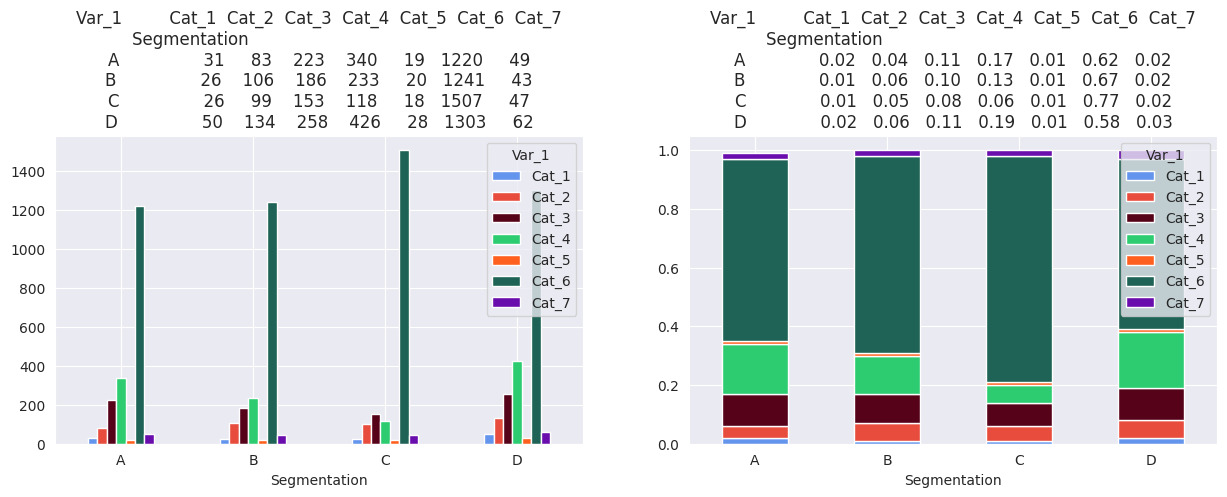

In [ ]:
# Counting Var_1 in each segment
pal = ["#6495ED", "#e74c3c", "#560319", "#2ecc71", "#FF5F1F", "#1F6357", "#6A0DAD"]
ax1 = df.groupby(["Segmentation"])["Var_1"].value_counts().unstack().round(3)

# Percentage of category of Var_1 in each segment
ax2 = df.pivot_table(columns='Var_1',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot graph

fig, ax = (plt.subplots(1,2))
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4), color=pal)
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bar graph
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4), color=pal)
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

When we observe both the graphs the proportion of Category_6 is higher compared to the other categories. So most of the entries must belong to the cat_6.




**Feature 2 - Gender**

In [ ]:
print('The count of gender\n',df.Gender.value_counts())

The count of gender
 Male      4409
Female    3640
Name: Gender, dtype: int64


In [ ]:
df.Gender.isnull().sum()

0

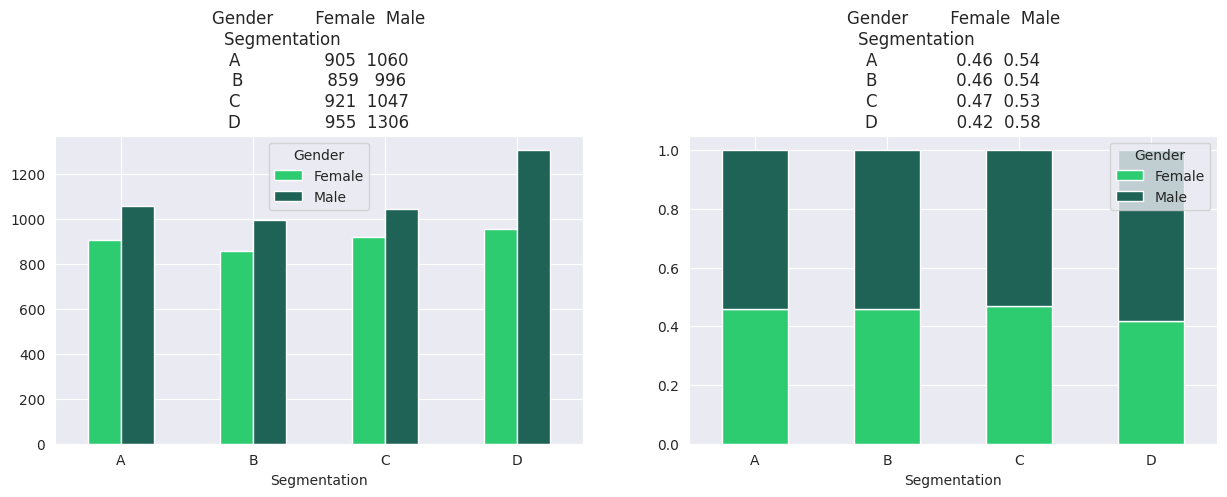

In [ ]:
# Counting male-female gender in each segment (A,B,C,D)
pal1 = ["#2ecc71", "#1F6357"]
ax1 = df.groupby(["Segmentation"])["Gender"].value_counts().unstack().round(3)

# Percentage of male-female in each segment
ax2 = df.pivot_table(columns='Gender',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4), color = pal1)
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4), color = pal1)
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

We can observe from both the plots that all the four segments (A,B,C,D) have more or less same number of male-female distribution. In all the segments the male population is more than the female population and the segment D has the highest male percentage when we compare it to A,B,C segments.


**Feature 3 - Martial Status**

In [ ]:
#ever Married
print('Count of married vs not married\n',df.Ever_Married.value_counts())

Count of married vs not married
 Yes    4635
No     3280
Name: Ever_Married, dtype: int64


In [ ]:
# Checking the count of missing values
df.Ever_Married.isnull().sum()

134

In [ ]:
# Filling the missing values with respect to other attributes underlying pattern
df.loc[ (pd.isnull(df["Ever_Married"])) & ((df['Spending_Score'] == 'Average') | (df['Spending_Score'] == 'High')),"Ever_Married"] = 'Yes'
df.loc[ (pd.isnull(df["Ever_Married"])) & (df['Spending_Score'] == 'Low'),"Ever_Married"] = 'No'
df.loc[ (pd.isnull(df["Ever_Married"])) & (df['Age'] > 40),"Ever_Married"] = 'Yes'
df.loc[ (pd.isnull(df["Ever_Married"])) & (df['Profession'] == 'Healthcare'),"Ever_Married"] = 'No'

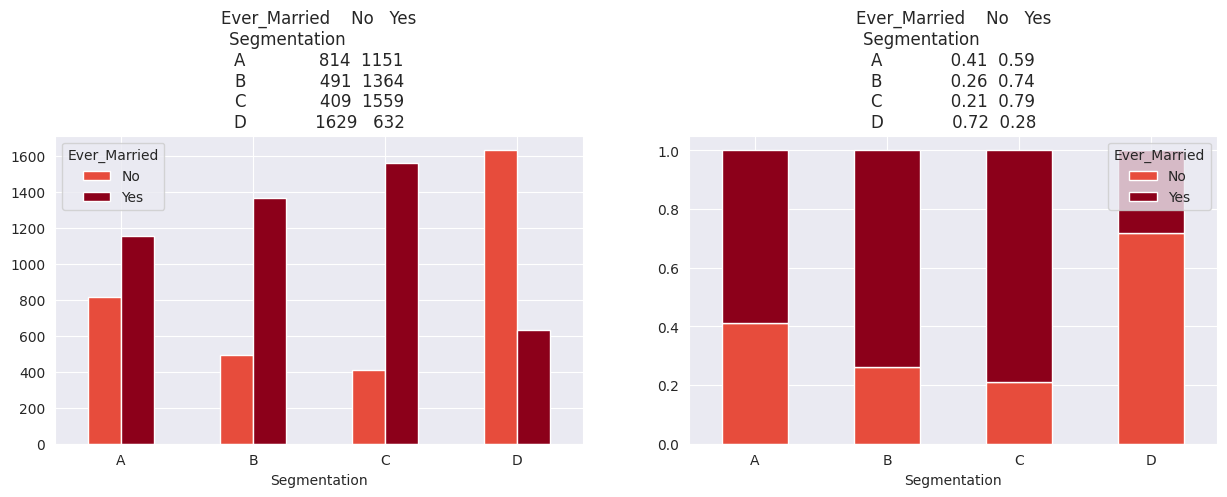

In [ ]:
# Counting married and non-married in each segment
pal2 = ["#e74c3c", "#8C001A"]
ax1 = df.groupby(["Segmentation"])["Ever_Married"].value_counts().unstack().round(3)

# Percentage of married and non-married in each segment
ax2 = df.pivot_table(columns='Ever_Married',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4), color = pal2)
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4), color = pal2)
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

From the graphs we can observe that most of the customers are married and segment C has the more number of married people and segment D has the least. this implicates that Segment D is a group of customers who are young in age and are most preferably singles.


**Feature 4 - Age**

In [ ]:
df.Age.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    8049.000000
mean       43.458442
std        16.704328
min        18.000000
25%        30.000000
50%        40.000000
75%        53.000000
90%        69.000000
95%        77.000000
99%        87.000000
max        89.000000
Name: Age, dtype: float64

In [ ]:
# Checking the count of missing values
df.Age.isnull().sum()

0

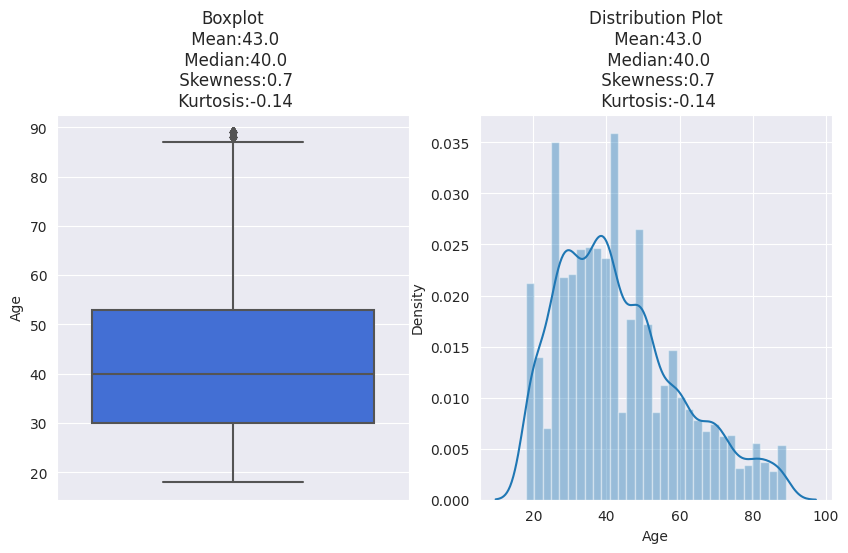

In [ ]:
# Distribution of the age feature
pal4 = ["#2B65EC"]
plt.figure(figsize=(10,5))
skewness = round(df.Age.skew(),2)
kurtosis = round(df.Age.kurtosis(),2)
mean = round(np.mean(df.Age),0)
median = np.median(df.Age)

plt.subplot(1,2,1)
sns.boxplot(y=df.Age, palette = pal4)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(1,2,2)
sns.distplot(df.Age)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

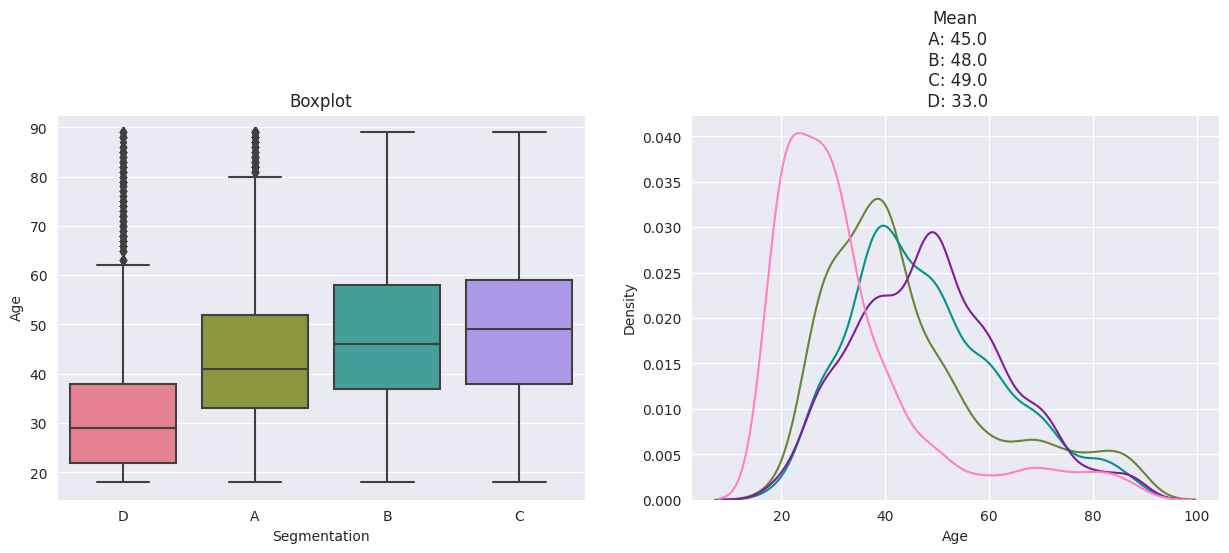

In [ ]:
# Probing the distribution of age feature with respect to each segment
a = df[df.Segmentation =='A']["Age"]
b = df[df.Segmentation =='B']["Age"]
c = df[df.Segmentation =='C']["Age"]
d = df[df.Segmentation =='D']["Age"]
sns.color_palette("husl", 4)
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df, x = "Segmentation", y="Age", palette = "husl")
plt.title('Boxplot')


plt.subplot(1,2,2)

sns.kdeplot(a,shade= False, label = 'A', color = sns.xkcd_rgb['swamp'])
sns.kdeplot(b,shade= False, label = 'B', color = sns.xkcd_rgb['teal'])
sns.kdeplot(c,shade= False, label = 'C', color = sns.xkcd_rgb['purple'])
sns.kdeplot(d,shade= False, label = 'D', color = sns.xkcd_rgb['pink'])
plt.xlabel('Age')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

The mean age of segment D is 33 years, so most of the customers are in their 30's. This is the reason that we observed that Segment D has the most number of singles. Further Segment C has the mean age of 49 and that is the reason most of the customers in that segment are married. We can correlate the age feature and martial status feature using these observations.



In [ ]:
# Converting the datatype from float to int
df['Age'] = df['Age'].astype(int)

In [ ]:
df.Age.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    8049.000000
mean       43.458442
std        16.704328
min        18.000000
25%        30.000000
50%        40.000000
75%        53.000000
90%        69.000000
95%        77.000000
99%        87.000000
max        89.000000
Name: Age, dtype: float64

In [ ]:
# Classifying people in to four age groups
df['Age_Bin'] = pd.cut(df.Age,bins=[17,30,45,60,90],labels=['17-30','31-45','46-60','60+'])

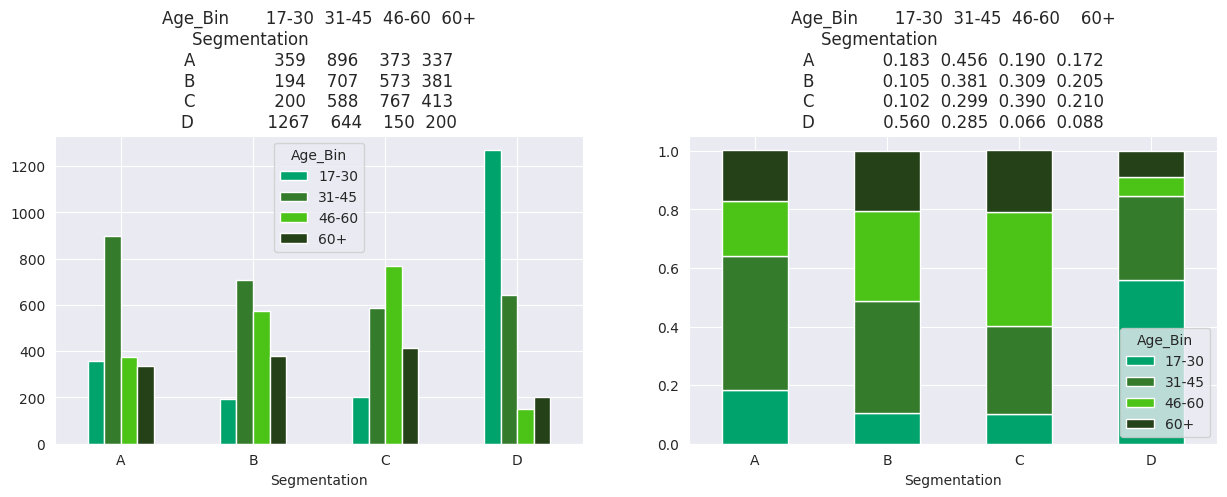

In [ ]:
# Counting different age group in each segment
pal5 = ["#00A36C", "#347C2C", "#4CC417", "#254117"]
ax1 = df.groupby(["Segmentation"])["Age_Bin"].value_counts().unstack().round(3)

# Percentage of age bins in each segment
ax2 = df.pivot_table(columns='Age_Bin',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(3)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4), color = pal5)
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4), color = pal5)
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

**Feature 5 - Graduate Status**

In [ ]:
print('Count of graduate and non-graduate\n',df.Graduated.value_counts())

Count of graduate and non-graduate
 Yes    4965
No     3012
Name: Graduated, dtype: int64


In [ ]:
# Checking the count of missing values
df.Graduated.isnull().sum()

72

In [ ]:
# Filling the missing values w.r.t other attributes underlying pattern
df.loc[ (pd.isnull(df["Graduated"])) & (df['Spending_Score'] == 'Average'),"Graduated"] = 'Yes'
df.loc[ (pd.isnull(df["Graduated"])) & (df['Profession'] == 'Artist'),"Graduated"] = 'Yes'
df.loc[ (pd.isnull(df["Graduated"])) & (df['Age'] > 49),"Graduated"] = 'Yes'
df.loc[ (pd.isnull(df["Graduated"])) & (df['Var_1'] == 'Cat_4'),"Graduated"] = 'No'
df.loc[ (pd.isnull(df["Graduated"])) & (df['Ever_Married'] == 'Yes'),"Graduated"] = 'Yes'

# Replacing remaining NaN with previous values
df['Graduated'] = df['Graduated'].fillna(method='pad')

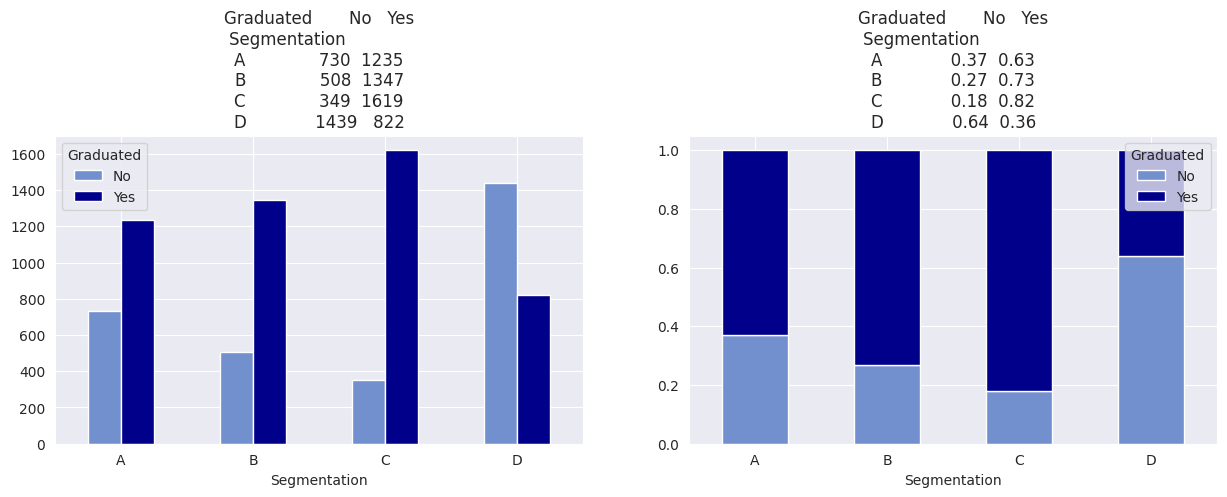

In [ ]:
# Counting graduate and non-graduate in each segment
pal6 = ["#728FCE", "#00008B"]
ax1 = df.groupby(["Segmentation"])["Graduated"].value_counts().unstack().round(3)

# Percentage of graduate and non-graduate in each segment
ax2 = df.pivot_table(columns='Graduated',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4), color = pal6)
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4), color = pal6)
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

From the plits we can infer that the Segment C has most number of customers who are graduated while segment D has lowest number of customers who are graduates.

**Feature 6 - Profession**

In [ ]:
print('Count of each profession\n',df.Profession.value_counts())

Count of each profession
 Artist           2515
Healthcare       1331
Entertainment     949
Engineer          699
Doctor            688
Lawyer            619
Executive         598
Marketing         291
Homemaker         246
Name: Profession, dtype: int64


In [ ]:
# Checking the count of missing values
df.Profession.isnull().sum()

113

In [ ]:
 # Filling the missing values w.r.t other attributes underlying pattern
df.loc[ (pd.isnull(df["Profession"])) & (df['Work_Experience'] > 8),"Profession"] = 'Homemaker'
df.loc[ (pd.isnull(df["Profession"])) & (df['Age'] > 70),"Profession"] = 'Lawyer'
df.loc[ (pd.isnull(df["Profession"])) & (df['Family_Size'] < 3),"Profession"] = 'Lawyer'
df.loc[ (pd.isnull(df["Profession"])) & (df['Spending_Score'] == 'Average'),"Profession"] = 'Artist'
df.loc[ (pd.isnull(df["Profession"])) & (df['Graduated'] == 'Yes'),"Profession"] = 'Artist'
df.loc[ (pd.isnull(df["Profession"])) & (df['Ever_Married'] == 'Yes'),"Profession"] = 'Artist'
df.loc[ (pd.isnull(df["Profession"])) & (df['Ever_Married'] == 'No'),"Profession"] = 'Healthcare'
df.loc[ (pd.isnull(df["Profession"])) & (df['Spending_Score'] == 'High'),"Profession"] = 'Executives'

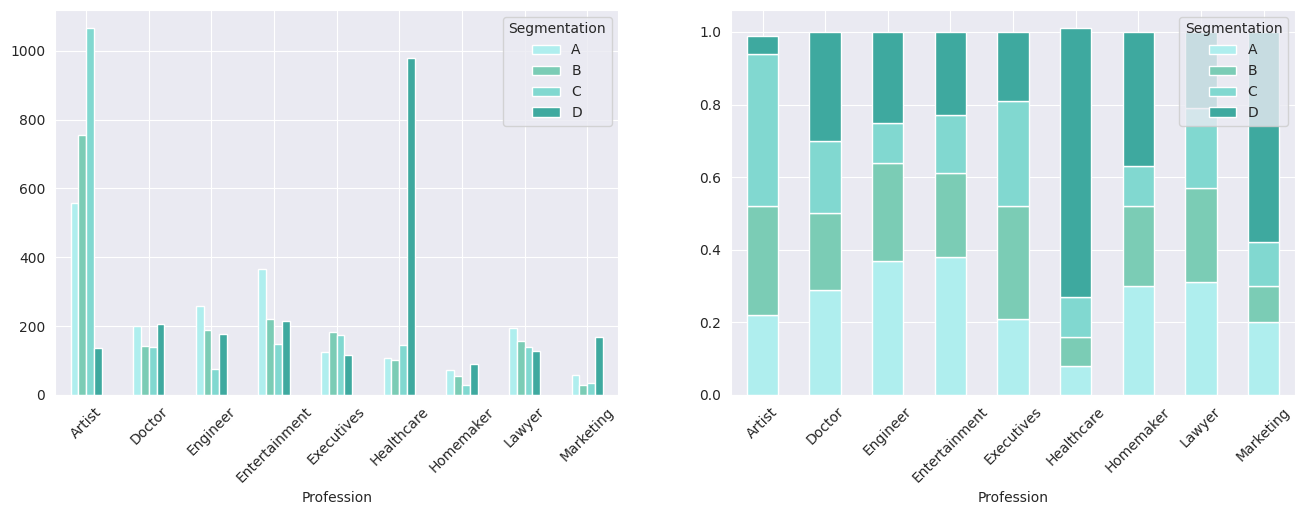

In [ ]:
# Count of segments in each profession
pal7 = ["#AFEEEE", "#7BCCB5", "#81D8D0", "#3EA99F"]
ax1 = df.groupby(["Profession"])["Segmentation"].value_counts().unstack().round(3)

# Percentage of segments in each profession
ax2 = df.pivot_table(columns='Segmentation',index='Profession',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (16,5), color = pal7)
label = ['Artist','Doctor','Engineer','Entertainment','Executives','Healthcare','Homemaker','Lawyer','Marketing']
ax[0].set_xticklabels(labels = label,rotation = 45)

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (16,5), color = pal7)
ax[1].set_xticklabels(labels = label,rotation = 45)

plt.show()

From the plots we can observe that most of the customers are artists in Segment A,B and C. Healthcare profession is more common in Segment D. Homemaker is least observed profession in all the segments.

**Feature 7 - Work Experience**

In [ ]:
df.Work_Experience.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    7236.000000
mean        2.642758
std         3.407044
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
90%         8.000000
95%         9.000000
99%        13.000000
max        14.000000
Name: Work_Experience, dtype: float64

In [ ]:
# Checking the count of missing values
df.Work_Experience.isnull().sum()

813

In [ ]:
# Filling NaN with previous values
df['Work_Experience'] = df['Work_Experience'].fillna(method='pad')

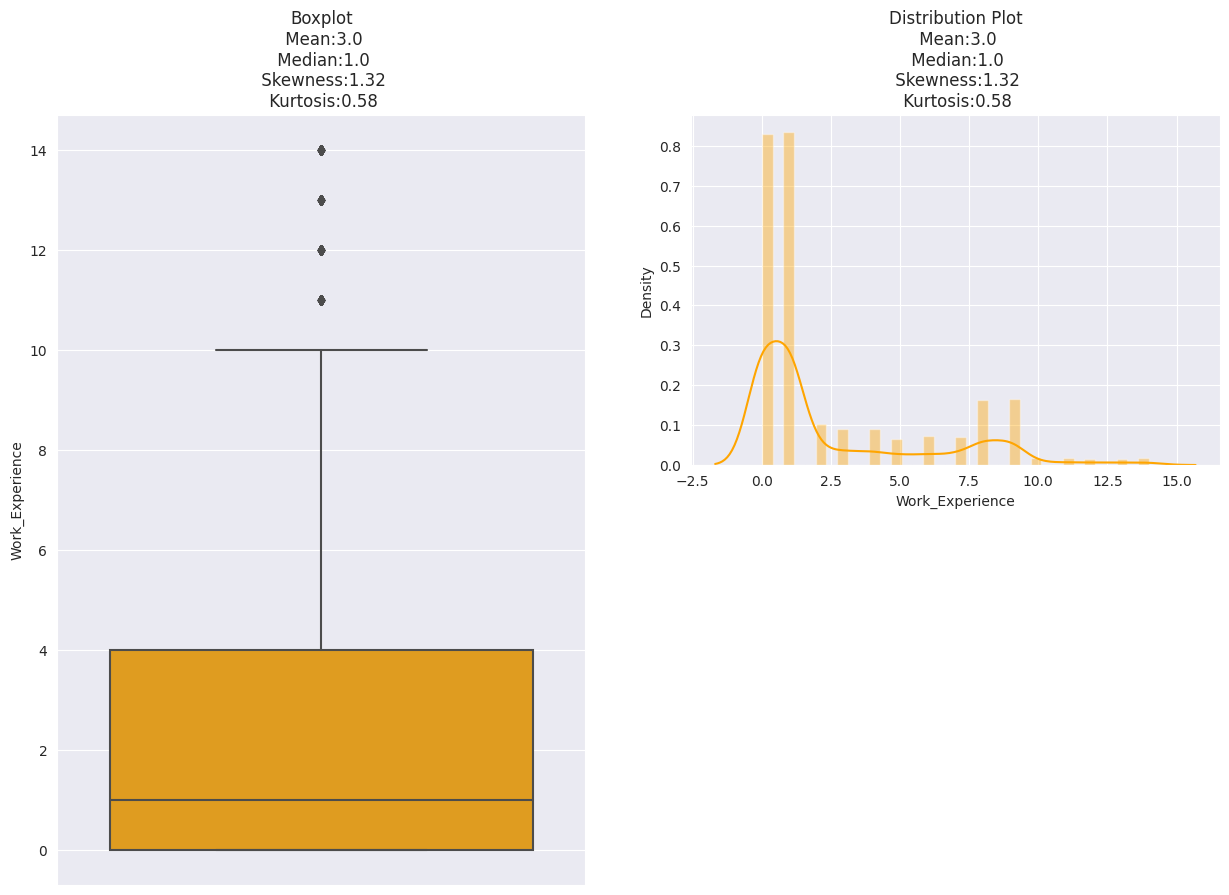

In [ ]:
# Looking the distribution of column Work Experience
pal8 = ["#FFA600"]
plt.figure(figsize=(15,10))

skewness = round(df.Work_Experience.skew(),2)
kurtosis = round(df.Work_Experience.kurtosis(),2)
mean = round(np.mean(df.Work_Experience),0)
median = np.median(df.Work_Experience)

plt.subplot(1,2,1)
sns.boxplot(y=df.Work_Experience, palette = pal8)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.distplot(df.Work_Experience, color='orange')
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

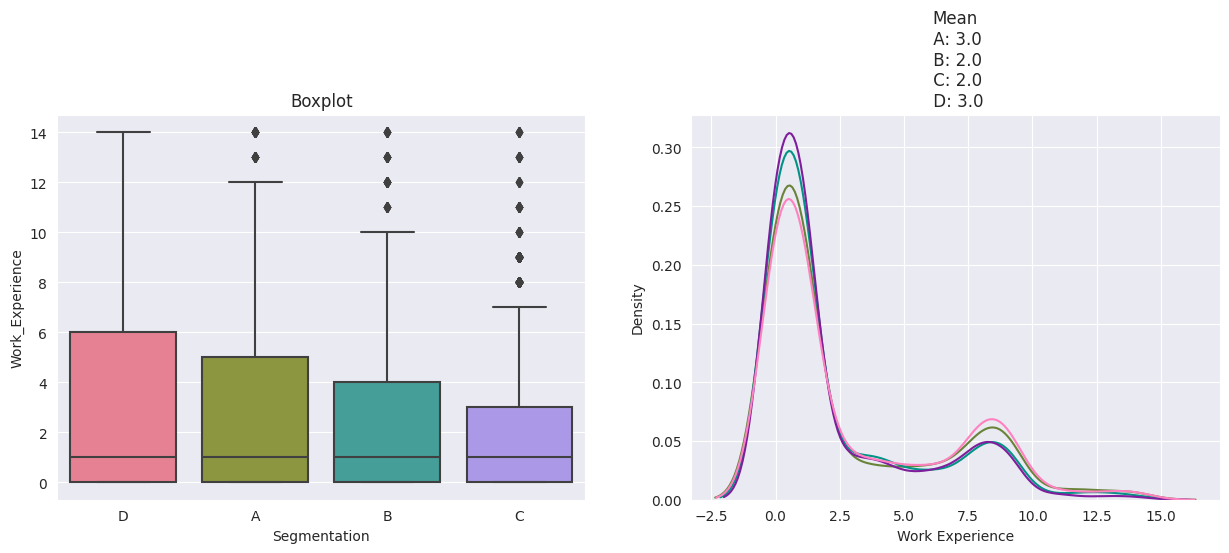

In [ ]:
# Looking the distribution of column Work_Experience w.r.t to each segment
a = df[df.Segmentation =='A']["Work_Experience"]
b = df[df.Segmentation =='B']["Work_Experience"]
c = df[df.Segmentation =='C']["Work_Experience"]
d = df[df.Segmentation =='D']["Work_Experience"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df, x = "Segmentation", y="Work_Experience", palette = "husl")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A', color = sns.xkcd_rgb['swamp'])
sns.kdeplot(b,shade= False, label = 'B', color = sns.xkcd_rgb['teal'])
sns.kdeplot(c,shade= False, label = 'C', color = sns.xkcd_rgb['purple'])
sns.kdeplot(d,shade= False, label = 'D', color = sns.xkcd_rgb['pink'])
plt.xlabel('Work Experience')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()


From the plots we can infer that Segment D has the more experienced workers and compared to other segments, segment C has customers with least experience.

In [ ]:
# Changing the data type
df['Work_Experience'] = df['Work_Experience'].astype(int)

In [ ]:
# Dividing the people into three categories of work experience (low, medium and high) 
df['Work_Exp_Category'] = pd.cut(df.Work_Experience,bins=[-1,1,7,15],labels=['Low Experience','Medium Experience','High Experience'])

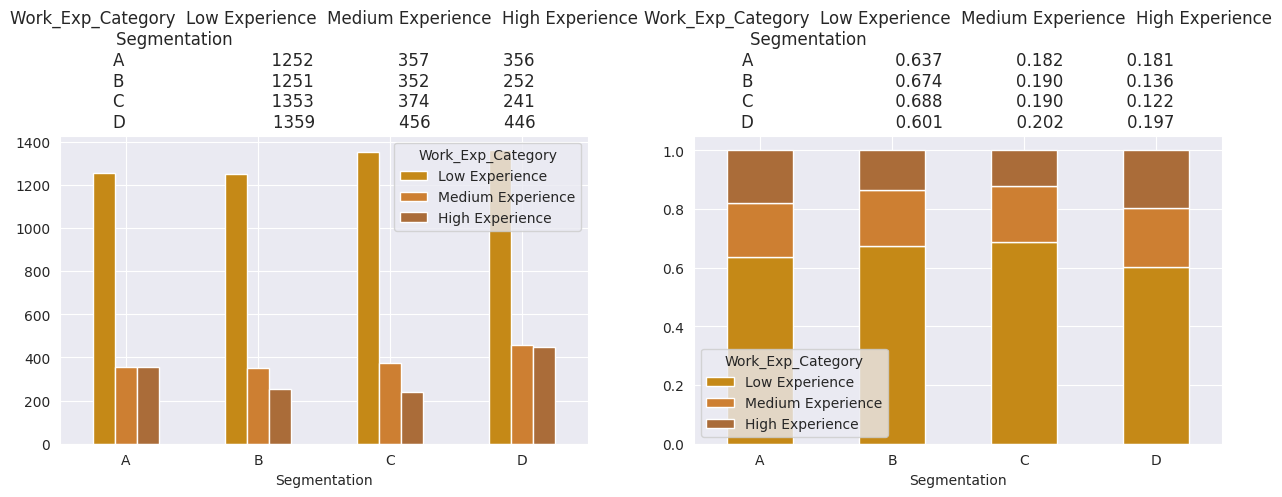

In [ ]:
# Counting different category of work experience in each segment

pal9 = ["#C58917", "#CD7F32", "#AA6C39"]
ax1 = df.groupby(["Segmentation"])["Work_Exp_Category"].value_counts().unstack().round(3)

# Percentage of work experience in each segment
ax2 = df.pivot_table(columns='Work_Exp_Category',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(3)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4), color = pal9)
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4), color = pal9)
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

**Feature 8 - Spending Score**

In [ ]:
#spending score
print('Count of spending score\n',df.Spending_Score.value_counts())

Count of spending score
 Low        4869
Average    1970
High       1210
Name: Spending_Score, dtype: int64


In [ ]:
# Checking the count of missing values
df.Spending_Score.isnull().sum()

0

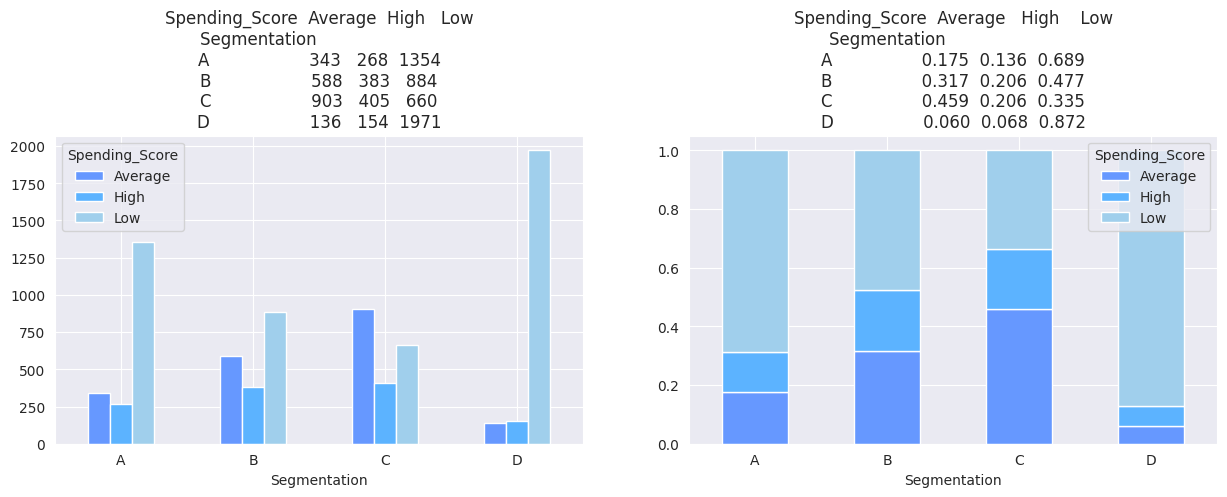

In [ ]:
# Counting different category of spending score in each segment
pal10 = ["#6698FF", "#5CB3FF", "#A0CFEC"]
ax1 = df.groupby(["Segmentation"])["Spending_Score"].value_counts().unstack().round(3)

# Percentage of spending score in each segment
ax2 = df.pivot_table(columns='Spending_Score',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(3)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4), color = pal10)
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4), color = pal10)
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

We can observe from the plots, Segment D has maximum number of people with low spending score while in Segment C has the most average spending people.

**Feature 9 - Family Size**

In [ ]:
df.Family_Size.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    7729.000000
mean        2.850175
std         1.531523
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
90%         5.000000
95%         6.000000
99%         8.000000
max         9.000000
Name: Family_Size, dtype: float64

In [ ]:
# Checking the count of missing values
df.Family_Size.isnull().sum()

320

In [ ]:
# Filling the missing values w.r.t other attributes underlying pattern
df.loc[ (pd.isnull(df["Family_Size"])) & (df['Ever_Married'] == 'Yes'),"Family_Size"] = 2.0
df.loc[ (pd.isnull(df["Family_Size"])) & (df['Var_1'] == 'Cat_6'),"Family_Size"] = 2.0
df.loc[ (pd.isnull(df["Family_Size"])) & (df['Graduated'] == 'Yes'),"Family_Size"] = 2.0

# Fill remaining NaN with previous values
df['Family_Size'] = df['Family_Size'].fillna(method='pad')

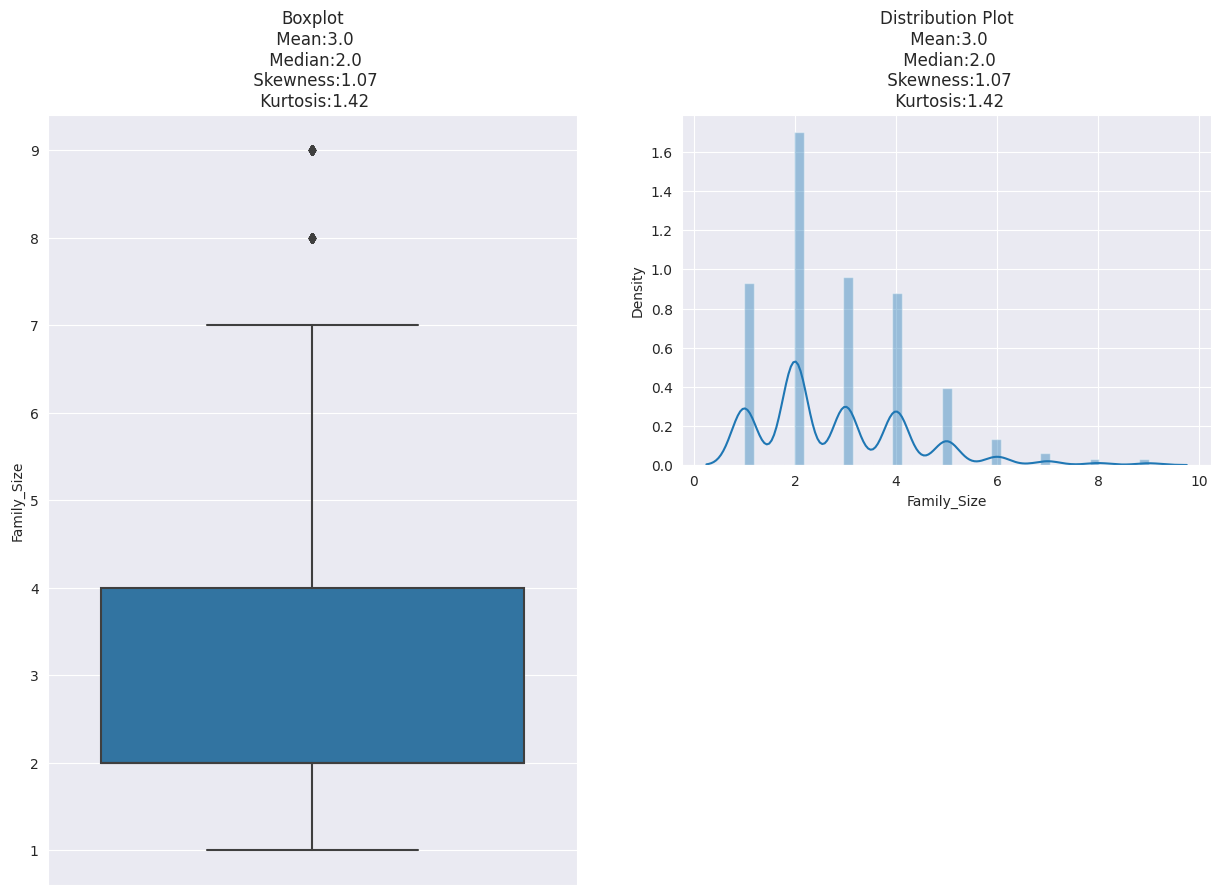

In [ ]:
# Looking the distribution of column Work Experience
plt.figure(figsize=(15,10))

skewness = round(df.Family_Size.skew(),2)
kurtosis = round(df.Family_Size.kurtosis(),2)
mean = round(np.mean(df.Family_Size),0)
median = np.median(df.Family_Size)

plt.subplot(1,2,1)
sns.boxplot(y=df.Family_Size)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.distplot(df.Family_Size)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

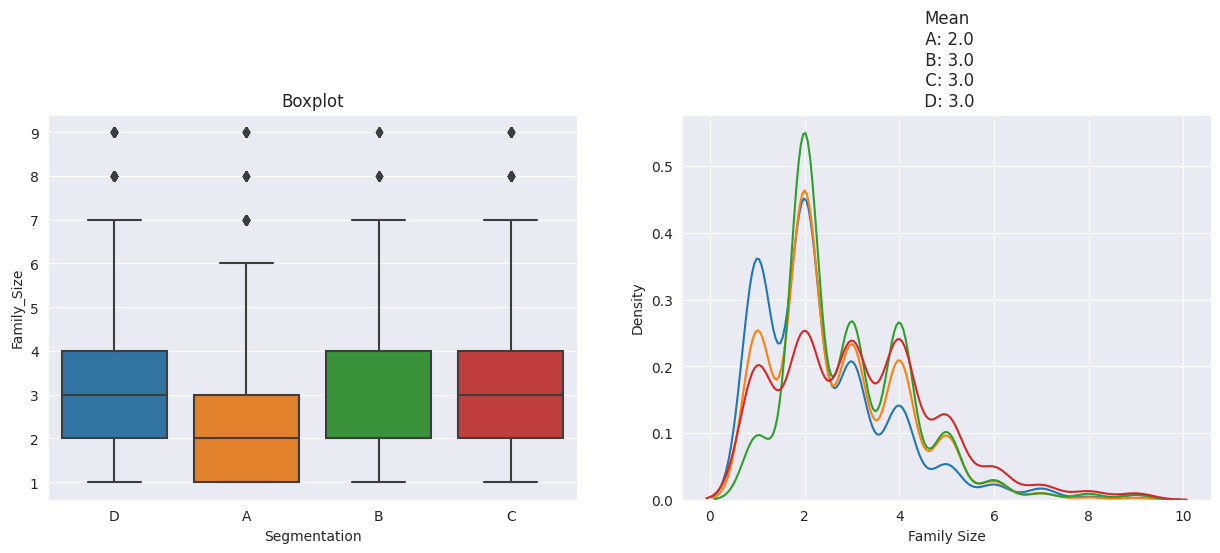

In [ ]:
# Looking the distribution of column Family Size w.r.t to each segment
a = df[df.Segmentation =='A']["Family_Size"]
b = df[df.Segmentation =='B']["Family_Size"]
c = df[df.Segmentation =='C']["Family_Size"]
d = df[df.Segmentation =='D']["Family_Size"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df, x = "Segmentation", y="Family_Size")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
sns.kdeplot(d,shade= False, label = 'D')
plt.xlabel('Family Size')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

In [ ]:
# Changing the data type
df['Family_Size'] = df['Family_Size'].astype(int)

In [ ]:
df.Family_Size.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    8049.000000
mean        2.820475
std         1.513836
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
90%         5.000000
95%         6.000000
99%         8.000000
max         9.000000
Name: Family_Size, dtype: float64

In [ ]:
# Divide family size into three categories
df['Family_Size_Category'] = pd.cut(df.Family_Size,bins=[0,4,6,10],labels=['Small Family','Big Family','Joint Family'])

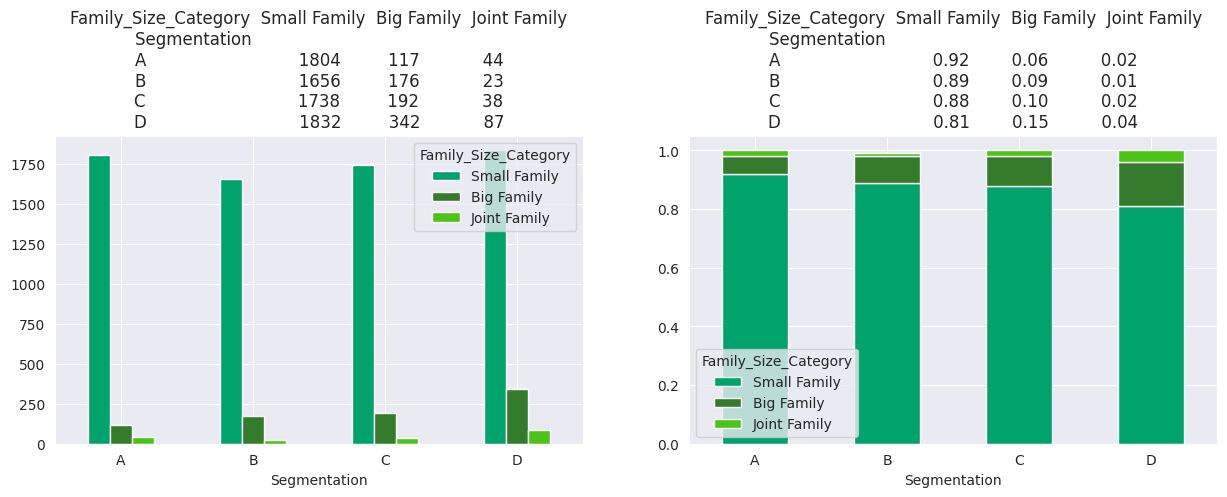

In [ ]:
# Counting different category of family size in each segment
pal11 = ["#00A36C", "#347C2C", "#4CC417"]
ax1 = df.groupby(["Segmentation"])["Family_Size_Category"].value_counts().unstack().round(3)

# Percentage of family size in each segment
ax2 = df.pivot_table(columns='Family_Size_Category',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4), color = pal11)
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4), color = pal11)
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In the given customer data, it is inferred that most of the people have a nuclear family (size of 1 or 2) unlike Segment D that has more number of family members classified as Big family.

In [ ]:
print('Count of each category of segmentation\n',df.Segmentation.value_counts())

Count of each category of segmentation
 D    2261
C    1968
A    1965
B    1855
Name: Segmentation, dtype: int64


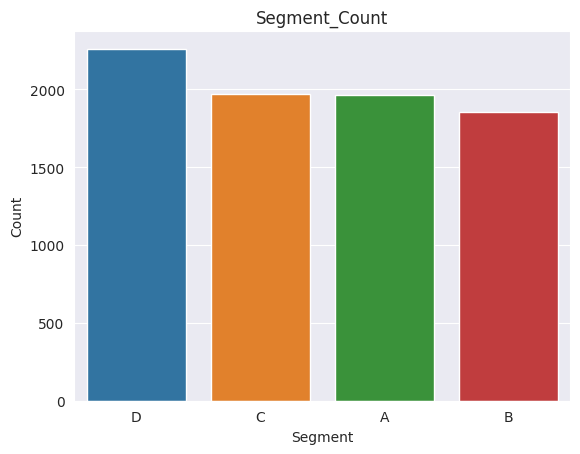

In [ ]:
segments = df.loc[:,"Segmentation"].value_counts()
plt.xlabel("Segment")
plt.ylabel('Count')
sns.barplot(x = segments.index, y = segments.values).set_title('Segment_Count')
plt.show()

In [ ]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    8049 non-null   int64   
 1   Gender                8049 non-null   object  
 2   Ever_Married          8049 non-null   object  
 3   Age                   8049 non-null   int64   
 4   Graduated             8049 non-null   object  
 5   Profession            7936 non-null   object  
 6   Work_Experience       8049 non-null   int64   
 7   Spending_Score        8049 non-null   object  
 8   Family_Size           8049 non-null   int64   
 9   Var_1                 8049 non-null   object  
 10  Segmentation          8049 non-null   object  
 11  Age_Bin               8049 non-null   category
 12  Work_Exp_Category     8049 non-null   category
 13  Family_Size_Category  8049 non-null   category
dtypes: category(3), int64(4), object(7)
memory usage: 715.9+

In [ ]:
# number of unique ids
df.ID.nunique()

8049

**Data Cleaning**

Now the data cleaning process is doone and there are no missing values in the dataset. All the ids are unique to ensure there is no duplicate entry. We have created three new columns: 'Age_Bin', 'Work_Exp_Category' and 'Family_Size_Category' and deleted only 0.2% of rows.

In [ ]:
df.describe(include='all')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Bin,Work_Exp_Category,Family_Size_Category
count,8049.000000,8049,8049,8049.000000,8049,7936,8049.000000,8049,8049.000000,8049,8049,8049,8049,8049
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4,4,3,3
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D,31-45,Low Experience,Small Family
freq,NaN,4409,4706,NaN,5023,2515,NaN,4869,NaN,5271,2261,2835,5215,7030
mean,463481.549012,NaN,NaN,43.458442,NaN,NaN,2.617965,NaN,2.820475,NaN,NaN,NaN,NaN,NaN
std,2595.221174,NaN,NaN,16.704328,NaN,NaN,3.394392,NaN,1.513836,NaN,NaN,NaN,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,461244.000000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,463476.000000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
75%,465746.000000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[['ID','Gender', 'Ever_Married', 'Age', 'Age_Bin', 'Graduated', 'Profession', 'Work_Experience', 'Work_Exp_Category',
         'Spending_Score', 'Family_Size', 'Family_Size_Category','Var_1', 'Segmentation']]
df.head(10)

,ID,Gender,Ever_Married,Age,Age_Bin,Graduated,Profession,Work_Experience,Work_Exp_Category,Spending_Score,Family_Size,Family_Size_Category,Var_1,Segmentation
0,462809,Male,No,22,17-30,No,Healthcare,1,Low Experience,Low,4,Small Family,Cat_4,D
1,462643,Female,Yes,38,31-45,Yes,Engineer,1,Low Experience,Average,3,Small Family,Cat_4,A
2,466315,Female,Yes,67,60+,Yes,Engineer,1,Low Experience,Low,1,Small Family,Cat_6,B
3,461735,Male,Yes,67,60+,Yes,Lawyer,0,Low Experience,High,2,Small Family,Cat_6,B
4,462669,Female,Yes,40,31-45,Yes,Entertainment,0,Low Experience,High,6,Big Family,Cat_6,A
5,461319,Male,Yes,56,46-60,No,Artist,0,Low Experience,Average,2,Small Family,Cat_6,C
6,460156,Male,No,32,31-45,Yes,Healthcare,1,Low Experience,Low,3,Small Family,Cat_6,C
7,464347,Female,No,33,31-45,Yes,Healthcare,1,Low Experience,Low,3,Small Family,Cat_6,D
8,465015,Female,Yes,61,60+,Yes,Engineer,0,Low Experience,Low,3,Small Family,Cat_7,D
9,465176,Female,Yes,55,46-60,Yes,Artist,1,Low Experience,Average,4,Small Family,Cat_6,C


**Making two different dataframes**

Now we consider creating two different dataframes apart from the above main dataframe (namely df)

**df1:** Spending Score(ranking), Age(normalise), Work_Experience(normalise), Family Size(normalise)

**df2:** Spending Score(dummy variables), Age Bin(dummy variables), Work_Exp_Category(dummy variables), Family_Size_Category(dummy variables)

In [ ]:
df1 = df.copy()
df1.head()

,ID,Gender,Ever_Married,Age,Age_Bin,Graduated,Profession,Work_Experience,Work_Exp_Category,Spending_Score,Family_Size,Family_Size_Category,Var_1,Segmentation
0,462809,Male,No,22,17-30,No,Healthcare,1,Low Experience,Low,4,Small Family,Cat_4,D
1,462643,Female,Yes,38,31-45,Yes,Engineer,1,Low Experience,Average,3,Small Family,Cat_4,A
2,466315,Female,Yes,67,60+,Yes,Engineer,1,Low Experience,Low,1,Small Family,Cat_6,B
3,461735,Male,Yes,67,60+,Yes,Lawyer,0,Low Experience,High,2,Small Family,Cat_6,B
4,462669,Female,Yes,40,31-45,Yes,Entertainment,0,Low Experience,High,6,Big Family,Cat_6,A


In [ ]:
# Separating dependent-independent variables
X = df1.drop('Segmentation',axis=1)
y = df1['Segmentation']

In [ ]:
# import the train-test split
from sklearn.model_selection import train_test_split

# divide into train and test sets
df1_trainX, df1_testX, df1_trainY, df1_testY = train_test_split(X,y, train_size = 0.7, random_state = 101, stratify=y)

Preprocessing on train data

In [ ]:
# converting binary variables to numeric
df1_trainX['Gender'] = df1_trainX['Gender'].replace(('Male','Female'),(1,0))
df1_trainX['Ever_Married'] = df1_trainX['Ever_Married'].replace(('Yes','No'),(1,0))
df1_trainX['Graduated'] = df1_trainX['Graduated'].replace(('Yes','No'),(1,0))
df1_trainX['Spending_Score'] = df1_trainX['Spending_Score'].replace(('High','Average','Low'),(3,2,1))

# converting nominal variables into dummy variables
pf = pd.get_dummies(df1_trainX.Profession,prefix='Profession')
df1_trainX = pd.concat([df1_trainX,pf],axis=1)

vr = pd.get_dummies(df1_trainX.Var_1,prefix='Var_1')
df1_trainX = pd.concat([df1_trainX,vr],axis=1)

# scaling continuous variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1_trainX[['Age','Work_Experience','Family_Size']] = scaler.fit_transform(df1_trainX[['Age','Work_Experience','Family_Size']])

df1_trainX.drop(['ID','Age_Bin','Profession','Work_Exp_Category','Family_Size_Category','Var_1'], axis=1, inplace=True)

Preprocessing on test data


In [ ]:
# converting binary variables to numeric
df1_testX['Gender'] = df1_testX['Gender'].replace(('Male','Female'),(1,0))
df1_testX['Ever_Married'] = df1_testX['Ever_Married'].replace(('Yes','No'),(1,0))
df1_testX['Graduated'] = df1_testX['Graduated'].replace(('Yes','No'),(1,0))
df1_testX['Spending_Score'] = df1_testX['Spending_Score'].replace(('High','Average','Low'),(3,2,1))

# converting nominal variables into dummy variables
pf = pd.get_dummies(df1_testX.Profession,prefix='Profession')
df1_testX = pd.concat([df1_testX,pf],axis=1)

vr = pd.get_dummies(df1_testX.Var_1,prefix='Var_1')
df1_testX = pd.concat([df1_testX,vr],axis=1)

# scaling continuous variables
df1_testX[['Age','Work_Experience','Family_Size']] = scaler.transform(df1_testX[['Age','Work_Experience','Family_Size']])

df1_testX.drop(['ID','Age_Bin','Profession','Work_Exp_Category','Family_Size_Category','Var_1'], axis=1, inplace=True)

In [ ]:
df1_trainX.shape, df1_trainY.shape, df1_testX.shape, df1_testY.shape

((5634, 23), (5634,), (2415, 23), (2415,))

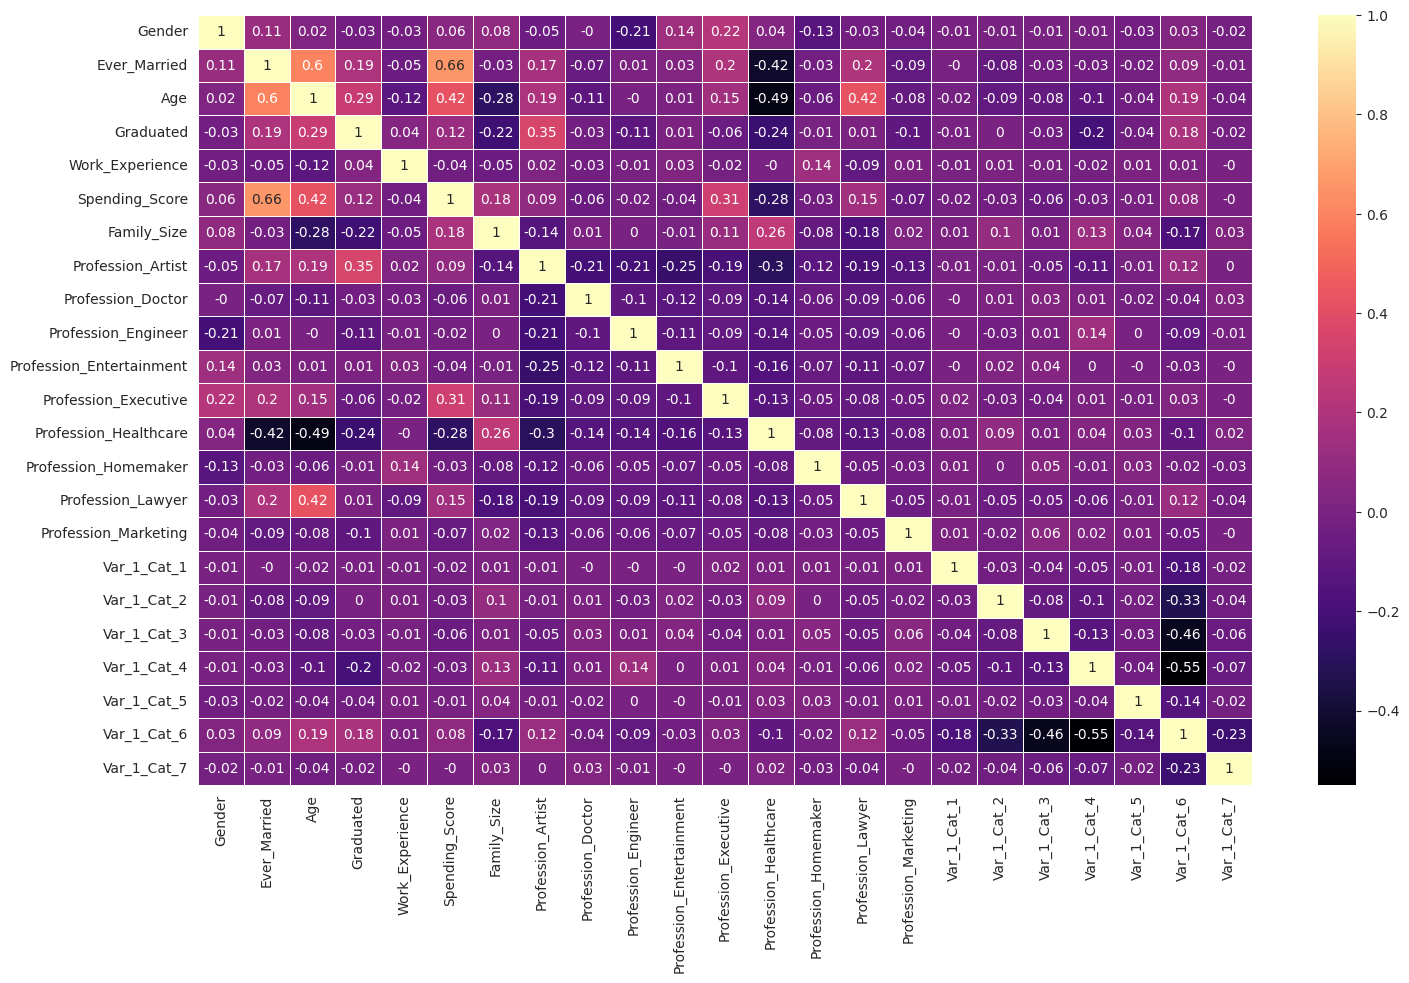

In [ ]:
# Correlation matrix
plt.figure(figsize=(17,10))
sns.heatmap(df1_trainX.corr(method='spearman').round(2),linewidth = 0.5,annot=True,cmap="magma")
plt.show()

**Observations:**

From the correlation matrix we can interpret the relationship between the features as follows:

 * Age and Ever_Married have a positive correlation of 0.6 which means that 
people who are married have more age as compared to those who are unmarried.

* Age and Profession_Healthcare have a negative correlation of 0.5 which means that all those people whose profession is healthcare are younger in age to those who do other professions.

* Customers having healthcare as their profession and Ever_Married feature have negative correlation of 0.42 which means all those peoples whose profession is healthcare are unmarried inferring only 13% of healthcare professionals are married.

* Age and Profession_Lawyer feature have a positive correlation of 0.42 which means all those people whose profession is lawyer are older in age to those of people in other profession.

* Ever_Married and Spending_Average features have a positive correlation which means those who are married spend averagely indicating around 42% married people spent on an average.

* Ever_Married and Spending_High has a little positive correlation which means those who are married spend high (around 25% of married people spent high).

* Ever_Married and Spending_Low has a negative correlation of 0.67 which means those who are unmarried spent low showing around 99% of unmarried people spent low.

* Age and Spending_Score feature has a positive correlation of 0.42 which means as age increase the spending power also increases.

* Customers with Executives as profession and Spending_High has positive correlation of 0.40 meaning that they spent high (around 66% of executives spent high).


In [ ]:
df2 = df.copy()
df2.head()

,ID,Gender,Ever_Married,Age,Age_Bin,Graduated,Profession,Work_Experience,Work_Exp_Category,Spending_Score,Family_Size,Family_Size_Category,Var_1,Segmentation
0,462809,Male,No,22,17-30,No,Healthcare,1,Low Experience,Low,4,Small Family,Cat_4,D
1,462643,Female,Yes,38,31-45,Yes,Engineer,1,Low Experience,Average,3,Small Family,Cat_4,A
2,466315,Female,Yes,67,60+,Yes,Engineer,1,Low Experience,Low,1,Small Family,Cat_6,B
3,461735,Male,Yes,67,60+,Yes,Lawyer,0,Low Experience,High,2,Small Family,Cat_6,B
4,462669,Female,Yes,40,31-45,Yes,Entertainment,0,Low Experience,High,6,Big Family,Cat_6,A


In [ ]:
# Separating dependent-independent variables
X = df2.drop('Segmentation',axis=1)
y = df2['Segmentation']

In [ ]:
# import the train-test split
from sklearn.model_selection import train_test_split

# divide into train and test sets
df2_trainX, df2_testX, df2_trainY, df2_testY = train_test_split(X,y, train_size = 0.7, random_state = 101, stratify=y)

Preprocessing in train data

In [ ]:
# Converting binary to numeric
df2_trainX['Gender'] = df2_trainX['Gender'].replace(('Male','Female'),(1,0))
df2_trainX['Ever_Married'] = df2_trainX['Ever_Married'].replace(('Yes','No'),(1,0))
df2_trainX['Graduated'] = df2_trainX['Graduated'].replace(('Yes','No'),(1,0))

# Converting nominal variables to dummy variables
ab = pd.get_dummies(df2_trainX.Age_Bin,prefix='Age_Bin')
df2_trainX = pd.concat([df2_trainX,ab],axis=1)

pf = pd.get_dummies(df2_trainX.Profession,prefix='Profession')
df2_trainX = pd.concat([df2_trainX,pf],axis=1)

we = pd.get_dummies(df2_trainX.Work_Exp_Category,prefix='WorkExp')
df2_trainX = pd.concat([df2_trainX,we],axis=1)

sc = pd.get_dummies(df2_trainX.Spending_Score,prefix='Spending')
df2_trainX = pd.concat([df2_trainX,sc],axis=1)

fs = pd.get_dummies(df2_trainX.Family_Size_Category,prefix='FamilySize')
df2_trainX = pd.concat([df2_trainX,fs],axis=1)

vr = pd.get_dummies(df2_trainX.Var_1,prefix='Var_1')
df2_trainX = pd.concat([df2_trainX,vr],axis=1)

df2_trainX.drop(['ID','Age','Age_Bin','Profession','Work_Experience','Work_Exp_Category','Spending_Score',
               'Family_Size','Family_Size_Category','Var_1'],axis=1,inplace=True)

Preprocessing in test data

In [ ]:
# Converting binary to numeric
df2_testX['Gender'] = df2_testX['Gender'].replace(('Male','Female'),(1,0))
df2_testX['Ever_Married'] = df2_testX['Ever_Married'].replace(('Yes','No'),(1,0))
df2_testX['Graduated'] = df2_testX['Graduated'].replace(('Yes','No'),(1,0))

# Converting nominal variables to dummy variables
ab = pd.get_dummies(df2_testX.Age_Bin,prefix='Age_Bin')
df2_testX = pd.concat([df2_testX,ab],axis=1)

pf = pd.get_dummies(df2_testX.Profession,prefix='Profession')
df2_testX = pd.concat([df2_testX,pf],axis=1)

we = pd.get_dummies(df2_testX.Work_Exp_Category,prefix='WorkExp')
df2_testX = pd.concat([df2_testX,we],axis=1)

sc = pd.get_dummies(df2_testX.Spending_Score,prefix='Spending')
df2_testX = pd.concat([df2_testX,sc],axis=1)

fs = pd.get_dummies(df2_testX.Family_Size_Category,prefix='FamilySize')
df2_testX = pd.concat([df2_testX,fs],axis=1)

vr = pd.get_dummies(df2_testX.Var_1,prefix='Var_1')
df2_testX = pd.concat([df2_testX,vr],axis=1)

df2_testX.drop(['ID','Age','Age_Bin','Profession','Work_Experience','Work_Exp_Category','Spending_Score',
               'Family_Size','Family_Size_Category','Var_1'],axis=1,inplace=True)

In [ ]:
df2_trainX.shape, df2_trainY.shape, df2_testX.shape, df2_testY.shape

((5634, 32), (5634,), (2415, 32), (2415,))

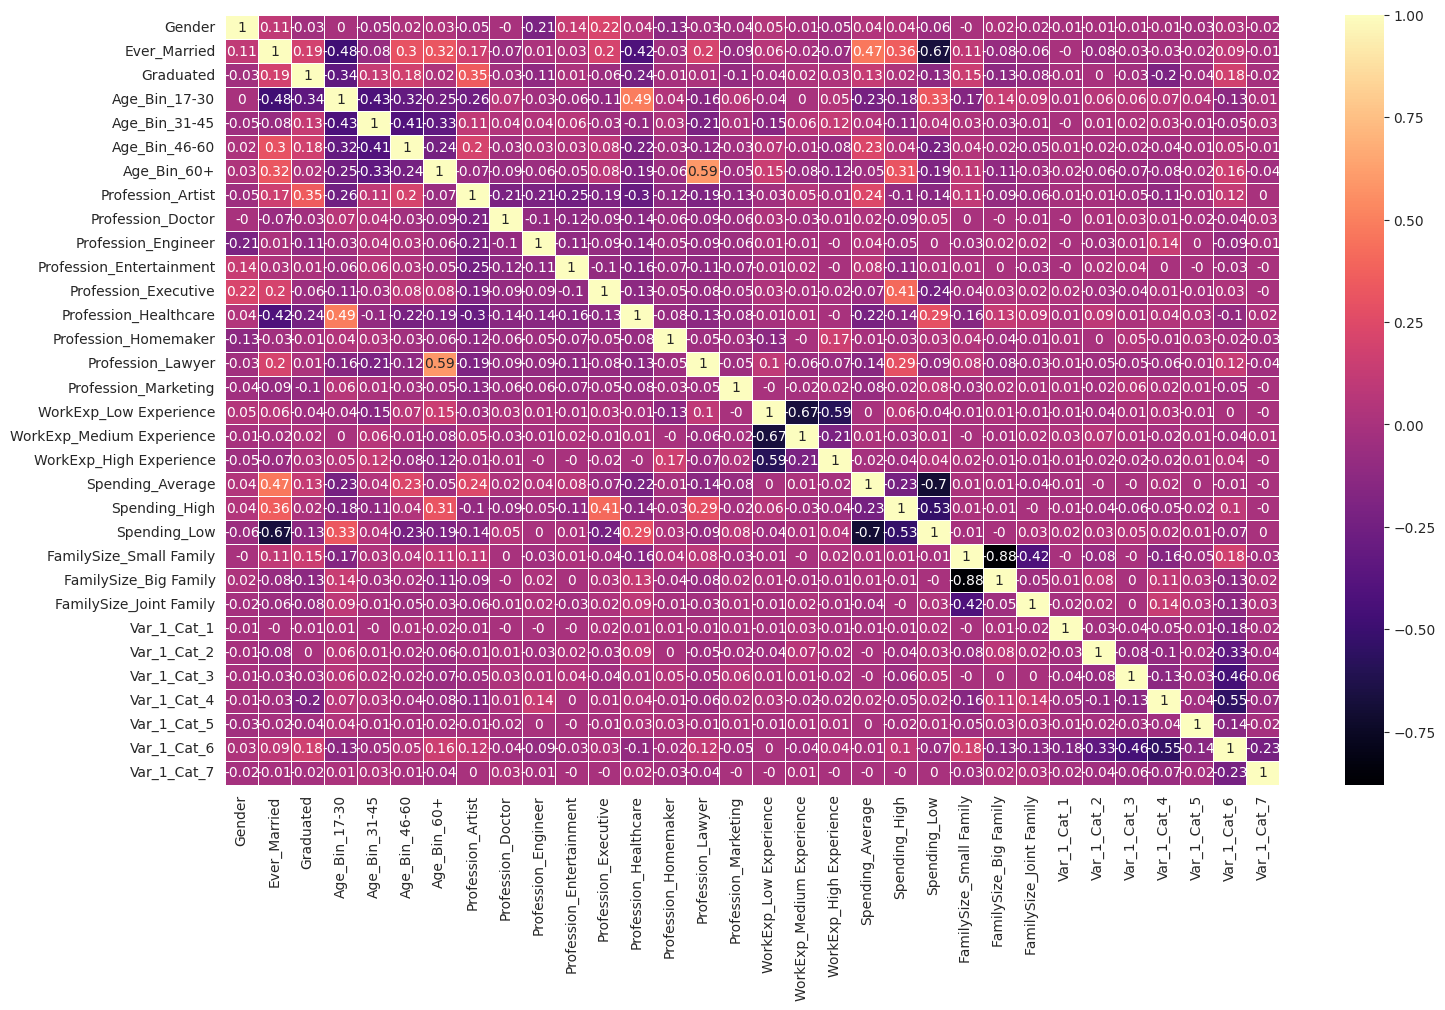

In [ ]:
# Correlation matrix
plt.figure(figsize=(17,10))
sns.heatmap(df2_trainX.corr(method='spearman').round(2),linewidth = 0.5,annot=True,cmap="magma")
plt.show()


# **Step II: Model Building**

# **I. One-Vs-Rest**

One-vs-rest (OvR for short, also referred to as One-vs-All or OvA) is a heuristic method for using binary classification algorithms for multi-class classification.

OvR mainly works by  splitting the multi-class dataset into multiple binary classification problems. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident.

For example, here we are given a multi-class classification problem with examples for each class 'A', 'B', 'C' and 'D'. This could be divided into four binary classification datasets as follows:
Binary Classification Problem 1: A vs [B,C,D]
Binary Classification Problem 2: B vs [A,C,D]
Binary Classification Problem 3: C vs [A,B,D]
Binary Classification Problem 4: D vs [A,B,C]

A possible downside of this approach is that it requires one model to be created for each class. For example, three classes requires three models. This could be an issue for large datasets (e.g. millions of rows), slow models (e.g. neural networks), or very large numbers of classes (e.g. hundreds of classes).

This approach requires that each model predicts a class membership probability or a probability-like score. The argmax of these scores (class index with the largest score) is then used to predict a class. 

This approach is commonly used for algorithms that naturally predict numerical class membership probability or score, such as:
Logistic Regression
Perceptron

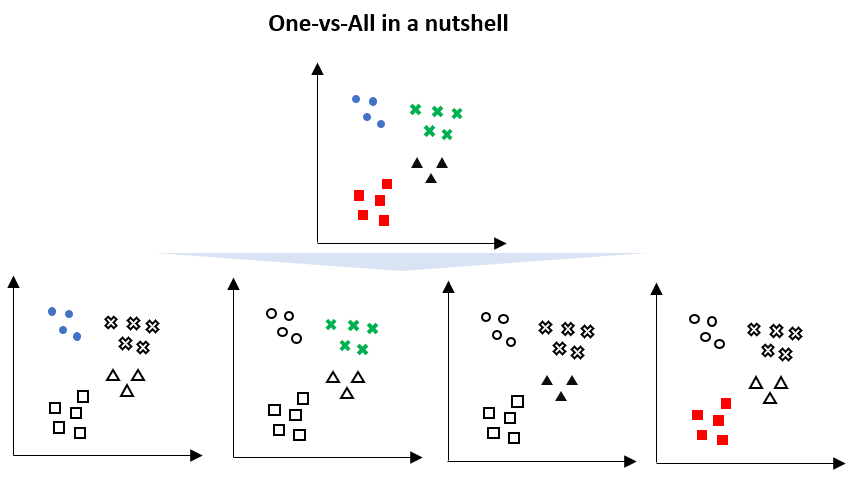

# **Step II- One-Vs-Rest Model Building**

**Building the model with first type of dataframe (df_type1)**

In [ ]:
train_ovr1_x = df1_trainX.copy()
train_ovr1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
3854,1,1,0.281690,1,0.357143,1,0.75,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6351,1,1,0.915493,1,0.500000,1,0.00,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1962,0,0,0.211268,1,0.500000,1,0.25,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2415,1,0,0.112676,1,0.928571,1,0.25,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1256,1,1,0.436620,1,0.000000,1,0.25,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
train_ovr1_y = df1_trainY.copy()
train_ovr1_y.head()

3854    A
6351    D
1962    C
2415    D
1256    B
Name: Segmentation, dtype: object

In [ ]:
# Importing the library
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

# Creating OvR object
ovr1 = OneVsRestClassifier(LinearSVC(random_state=0))

# Train model
model_ovr1 = ovr1.fit(train_ovr1_x, train_ovr1_y)

# Predicting the classes
yhat1 = ovr1.predict(train_ovr1_x)

# Looking at the coefficients of variables 
#print('-------Coefficient of variables obtained from each of the 4 models ------')
#print(model_ovr1.coef_)

# Looking at the intercepts 
#print('-------Intercept of each of the 4 models ------')
#print(model_ovr1.intercept_)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(train_ovr1_y.values, yhat1, labels=["A","B","C","D"])
print('\n\n-------The confusion matrix for this model is-------')
print(cm1)

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of the model-------')
print(classification_report(train_ovr1_y.values, yhat1))



-------The confusion matrix for this model is-------
[[ 633   62  376  304]
 [ 395   93  627  183]
 [ 189   38  966  185]
 [ 296   26  117 1144]]


-------Printing the report of the model-------
              precision    recall  f1-score   support

           A       0.42      0.46      0.44      1375
           B       0.42      0.07      0.12      1298
           C       0.46      0.70      0.56      1378
           D       0.63      0.72      0.67      1583

    accuracy                           0.50      5634
   macro avg       0.48      0.49      0.45      5634
weighted avg       0.49      0.50      0.46      5634



**Recall** - In an classification problem with two classes, recall is calculated as the number of true positives divided by the total number of true positives and false negatives.

**Precision**- In definition it is defined as the actual correct prediction divided by total prediction made by model

**Accuracy** - Accuracy represents the number of correctly classified data instances over the total number of data instances.

**F1-score** - F1 score is a weighted average of precision and recall. 

# **Predicting on test set - One-Vs-Rest**

In [ ]:
test_ovr1_x = df1_testX.copy()
test_ovr1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
5579,0,1,0.478873,1,0.071429,2,0.500,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7375,1,0,0.042254,0,0.071429,1,0.500,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6807,1,0,0.183099,0,0.000000,1,0.625,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4359,1,1,0.605634,1,0.000000,1,0.000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4390,1,1,0.830986,1,0.000000,1,0.000,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
test_ovr1_y = df1_testY.copy()
test_ovr1_y.head()

5579    B
7375    D
6807    D
4359    B
4390    A
Name: Segmentation, dtype: object

In [ ]:
y_ovr1 = ovr1.predict(test_ovr1_x)
y_ovr1

array(['B', 'D', 'D', ..., 'D', 'D', 'C'], dtype='<U1')

In [ ]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_ovr1_y.values, y_ovr1, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_ovr1_y.values, y_ovr1))

-------The confusion matrix for test data is-------

[[233  29 172 156]
 [143  47 299  68]
 [ 64  24 404  98]
 [124   8  42 504]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           A       0.41      0.39      0.40       590
           B       0.44      0.08      0.14       557
           C       0.44      0.68      0.54       590
           D       0.61      0.74      0.67       678

    accuracy                           0.49      2415
   macro avg       0.47      0.48      0.44      2415
weighted avg       0.48      0.49      0.45      2415



In [ ]:
pd.Series(y_ovr1).value_counts()

C    917
D    826
A    564
B    108
dtype: int64

In [ ]:
train_ovr2_x = df2_trainX.copy()
train_ovr2_x.head()

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
3854,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
6351,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1962,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2415,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1256,1,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
train_ovr2_y = df2_trainY.copy()
train_ovr2_y.head()

3854    A
6351    D
1962    C
2415    D
1256    B
Name: Segmentation, dtype: object

In [ ]:
# Importing the library
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

# Creating OvR object
ovr2 = OneVsRestClassifier(LinearSVC(random_state=0))

# Train model
model_ovr2 = ovr2.fit(train_ovr2_x, train_ovr2_y)

# Predicting the classes
yhat2 = ovr2.predict(train_ovr2_x)

# Looking at the coefficients of variables 
#print('-------Coefficient of variables obtained from each of the 4 models------')
#print(model_ovr2.coef_)

# Looking at the intercepts 
#print('\n-------Intercept of each of the 4 models ------')
#print(model_ovr2.intercept_)
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(train_ovr2_y.values, yhat2, labels=["A","B","C","D"])
print('\n\n-------The confusion matrix for this model is-------')
print(cm2)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_ovr2_y.values, yhat2))



-------The confusion matrix for this model is-------
[[ 678   84  293  320]
 [ 397  152  573  176]
 [ 201   68  932  177]
 [ 313   38   75 1157]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           A       0.43      0.49      0.46      1375
           B       0.44      0.12      0.19      1298
           C       0.50      0.68      0.57      1378
           D       0.63      0.73      0.68      1583

    accuracy                           0.52      5634
   macro avg       0.50      0.50      0.47      5634
weighted avg       0.51      0.52      0.49      5634



# **Predicting on test set - One-Vs-Rest**

In [ ]:
test_ovr2_x = df2_testX.copy()
test_ovr2_x.head()


,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
5579,0,1,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
7375,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6807,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4359,1,1,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4390,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
test_ovr2_x = df2_testX.copy()
test_ovr2_x.head()

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
5579,0,1,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
7375,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6807,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4359,1,1,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4390,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
y_ovr2 = ovr2.predict(test_ovr2_x)
y_ovr2

array(['C', 'D', 'D', ..., 'A', 'D', 'C'], dtype='<U1')

In [ ]:
test_ovr2_y = df2_testY.copy()
test_ovr2_y.head()

5579    B
7375    D
6807    D
4359    B
4390    A
Name: Segmentation, dtype: object

In [ ]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_ovr2_y.values, y_ovr2, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_ovr2_y.values, y_ovr2))

-------The confusion matrix for test data is-------

[[250  49 146 145]
 [134  61 286  76]
 [ 73  31 392  94]
 [127  11  43 497]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           A       0.43      0.42      0.43       590
           B       0.40      0.11      0.17       557
           C       0.45      0.66      0.54       590
           D       0.61      0.73      0.67       678

    accuracy                           0.50      2415
   macro avg       0.47      0.48      0.45      2415
weighted avg       0.48      0.50      0.46      2415



In [ ]:
pd.Series(y_ovr2).value_counts()

C    867
D    812
A    584
B    152
dtype: int64


# **Step III: One-vs-Rest Model Evaluation**

In [ ]:
print('************************  MODEL-1 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_ovr1_y.values, yhat1))
print('\nTest data')
print(classification_report(test_ovr1_y.values, y_ovr1))

************************  MODEL-1 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           A       0.42      0.46      0.44      1375
           B       0.42      0.07      0.12      1298
           C       0.46      0.70      0.56      1378
           D       0.63      0.72      0.67      1583

    accuracy                           0.50      5634
   macro avg       0.48      0.49      0.45      5634
weighted avg       0.49      0.50      0.46      5634


Test data
              precision    recall  f1-score   support

           A       0.41      0.39      0.40       590
           B       0.44      0.08      0.14       557
           C       0.44      0.68      0.54       590
           D       0.61      0.74      0.67       678

    accuracy                           0.49      2415
   macro avg       0.47      0.48      0.44      2415
weighted avg       0.48      0.49      0.45      2415



**Observation**:
1. In training model set the accuracy was around 0.5 while in test set it is 0.49, without any visible difference.
2. This model is good  for Segment C and D as their recall values are high and close in both train and test set.

In [ ]:
print('************************  MODEL-2 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_ovr2_y.values, yhat2))
print('\nTest data')
print(classification_report(test_ovr2_y.values, y_ovr2))

************************  MODEL-2 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           A       0.43      0.49      0.46      1375
           B       0.44      0.12      0.19      1298
           C       0.50      0.68      0.57      1378
           D       0.63      0.73      0.68      1583

    accuracy                           0.52      5634
   macro avg       0.50      0.50      0.47      5634
weighted avg       0.51      0.52      0.49      5634


Test data
              precision    recall  f1-score   support

           A       0.43      0.42      0.43       590
           B       0.40      0.11      0.17       557
           C       0.45      0.66      0.54       590
           D       0.61      0.73      0.67       678

    accuracy                           0.50      2415
   macro avg       0.47      0.48      0.45      2415
weighted avg       0.48      0.50      0.46      2415



**Observation:**

1. In training set the model gave an accuracy of 0.52 while in test set it is 0.50, without any visible difference.
2. This model is good only for segment C and D as their recall values are high close in both train and test sets.
3. But this second model is better than the previous model as this model predicts better results for segment B also.
4. So we infer that **model-2 is better than model-1 in OvR technique.**

1. Both the reports from Model-1 and Model-2 are very similar in terms of accuracy, precision, recall and f1-score.
2. We can see Model-2 is better as than Model-1 because it has better results for Segment A and B.
3. We have to apply the One-vs-One model to check the results for the training and test data set.


# **II. One-vs-One (OvO)**

**One-vs-One:**

One-vs-One (OvO for short) is another heuristic method for using binary classification algorithms for multi-class classification. 

Like one-vs-rest, one-vs-one splits a multi-class classification dataset into binary classification problems. Unlike one-vs-rest that splits it into one binary dataset for each class, the one-vs-one approach splits the dataset into one dataset for each class versus every other class.

For example, this problem is a multi-class classification problem with four classes: A, B, C and D. This could be divided into six binary classification datasets as follows:
Binary Classification Problem 1: A vs B
Binary Classification Problem 2: A vs C
Binary Classification Problem 3: A vs D
Binary Classification Problem 4: B vs C
Binary Classification Problem 5: B vs D
Binary Classification Problem 6: C vs D

When predicting new points, each classifier votes on the class of the point, and the class with the most votes is chosen as the winner. In the event of a tie, you may select the class with the highest aggregate classification confidence by summing over the pair-wise classification confidence levels computed by the underlying binary classifiers.

The formula for calculating the number of binary datasets, and in turn, models, is as follows:(NumClasses * (NumClasses – 1)) / 2

One-vs-one classifier and OvR are both more computationally expensive, requiring far more classifiers to be trained, and less immediately interpretable. However, if the classifier being used scales poorly, and the dataset is sufficiently large, training this many two-class classifiers may be faster or provide better results than classification in the one-versus-rest scheme, which considers every point.

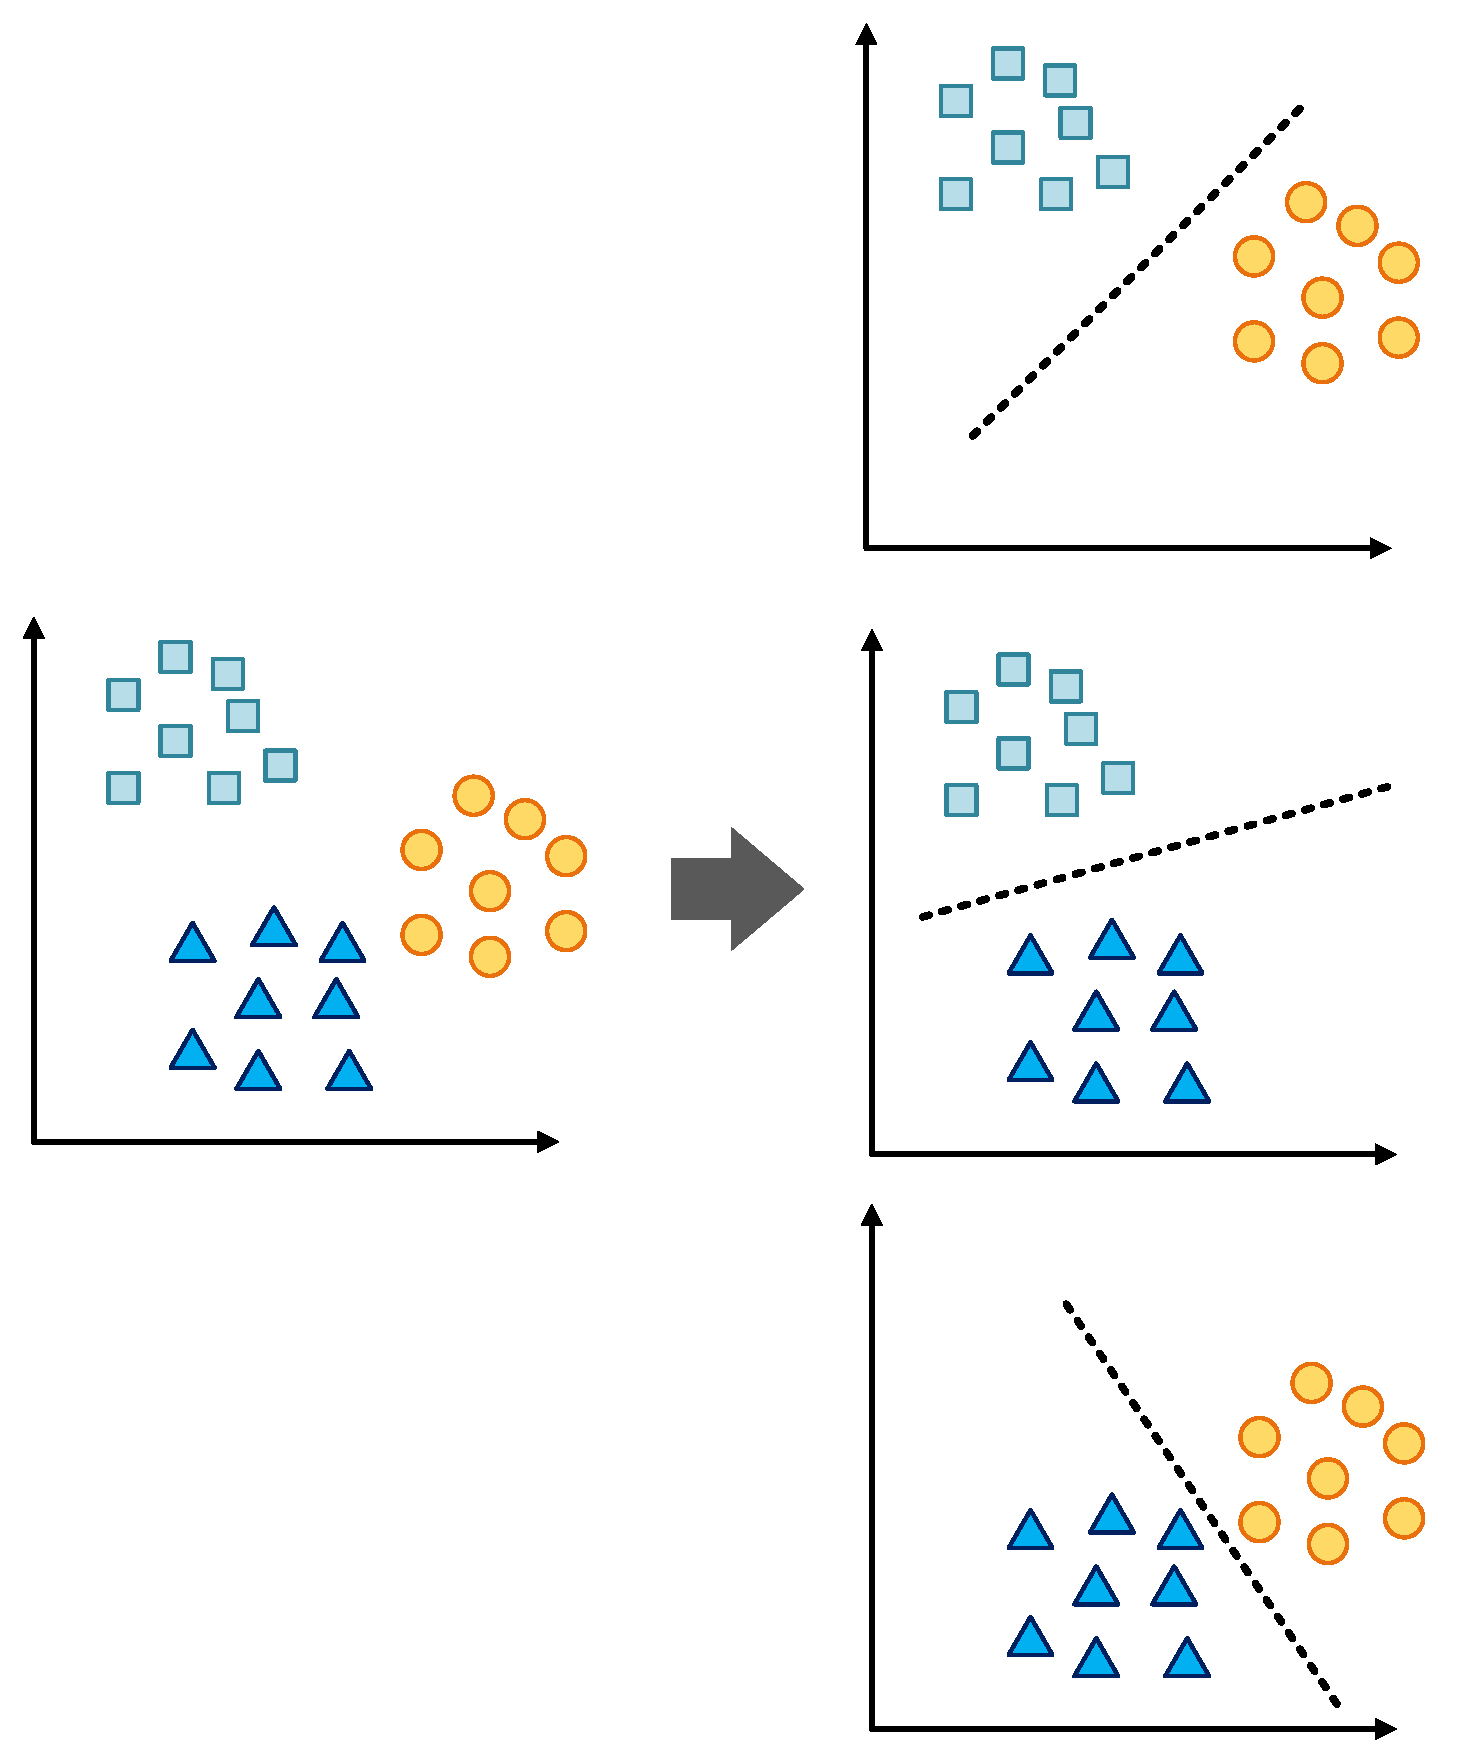

# **Step II: One-Vs-One Model Building**

**Building the model with first_type of dataframe(df_type1)**

In [ ]:
train_ovo1_x = df1_trainX.copy()
train_ovo1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
3854,1,1,0.281690,1,0.357143,1,0.75,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6351,1,1,0.915493,1,0.500000,1,0.00,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1962,0,0,0.211268,1,0.500000,1,0.25,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2415,1,0,0.112676,1,0.928571,1,0.25,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1256,1,1,0.436620,1,0.000000,1,0.25,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
train_ovo1_y = df1_trainY.copy()
train_ovo1_y.head()

3854    A
6351    D
1962    C
2415    D
1256    B
Name: Segmentation, dtype: object

In [ ]:
# Importing the library
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

# Creating OvO object
ovo1 = OneVsOneClassifier(LinearSVC(random_state=0))

# Train model
model_ovo1 = ovo1.fit(train_ovo1_x, train_ovo1_y)

# Predicting the classes
yhat3 = ovo1.predict(train_ovo1_x)

from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(train_ovo1_y.values, yhat3, labels=["A","B","C","D"])
print('-------The confusion matrix for this model is-------')
print(cm3)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_ovo1_y.values, yhat3))

-------The confusion matrix for this model is-------
[[ 664  184  268  259]
 [ 388  269  479  162]
 [ 195  132  878  173]
 [ 315   70   85 1113]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           A       0.43      0.48      0.45      1375
           B       0.41      0.21      0.28      1298
           C       0.51      0.64      0.57      1378
           D       0.65      0.70      0.68      1583

    accuracy                           0.52      5634
   macro avg       0.50      0.51      0.49      5634
weighted avg       0.51      0.52      0.50      5634



# **Predicting on test set - One-vs-One**

In [ ]:
test_ovo1_x = df1_testX.copy()
test_ovo1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
5579,0,1,0.478873,1,0.071429,2,0.500,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7375,1,0,0.042254,0,0.071429,1,0.500,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6807,1,0,0.183099,0,0.000000,1,0.625,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4359,1,1,0.605634,1,0.000000,1,0.000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4390,1,1,0.830986,1,0.000000,1,0.000,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
test_ovo1_y = df1_testY.copy()
test_ovo1_y.head()

5579    B
7375    D
6807    D
4359    B
4390    A
Name: Segmentation, dtype: object

In [ ]:
y_ovo1 = ovo1.predict(test_ovo1_x)
y_ovo1

array(['B', 'D', 'D', ..., 'A', 'D', 'C'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_ovo1_y.values, y_ovo1, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_ovo1_y.values, y_ovo1))

-------The confusion matrix for test data is-------

[[241  87 125 137]
 [152 115 231  59]
 [ 70  60 370  90]
 [123  35  37 483]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           A       0.41      0.41      0.41       590
           B       0.39      0.21      0.27       557
           C       0.48      0.63      0.55       590
           D       0.63      0.71      0.67       678

    accuracy                           0.50      2415
   macro avg       0.48      0.49      0.47      2415
weighted avg       0.48      0.50      0.48      2415



In [ ]:
pd.Series(y_ovo1).value_counts()

D    769
C    763
A    586
B    297
dtype: int64

**Building the model using second type dataframe(df_type2)**


In [ ]:
train_ovo2_x = df2_trainX.copy()
train_ovo2_x.head()

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
3854,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
6351,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1962,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2415,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1256,1,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
train_ovo2_y = df2_trainY.copy()
train_ovo2_y.head()

3854    A
6351    D
1962    C
2415    D
1256    B
Name: Segmentation, dtype: object

In [ ]:
# Importing the library
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

# Creating OvO object
ovo2 = OneVsOneClassifier(LinearSVC(random_state=0))

# Train model
model_ovo2 = ovo2.fit(train_ovo2_x, train_ovo2_y)

# Predicting the classes
yhat4 = ovo2.predict(train_ovo2_x)

from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(train_ovo2_y.values, yhat4, labels=["A","B","C","D"])
print('-------The confusion matrix for this model is-------')
print(cm4)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_ovo2_y.values, yhat4))

-------The confusion matrix for this model is-------
[[ 678  195  227  275]
 [ 367  323  451  157]
 [ 186  178  846  168]
 [ 335   75   57 1116]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           A       0.43      0.49      0.46      1375
           B       0.42      0.25      0.31      1298
           C       0.54      0.61      0.57      1378
           D       0.65      0.70      0.68      1583

    accuracy                           0.53      5634
   macro avg       0.51      0.52      0.51      5634
weighted avg       0.52      0.53      0.51      5634



# **Predicting on test set - One-vs-One**





In [ ]:
test_ovo2_x = df2_testX.copy()
test_ovo2_x.head()

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
5579,0,1,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
7375,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6807,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4359,1,1,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4390,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
test_ovo2_y = df2_testY.copy()
test_ovo2_y.head()

5579    B
7375    D
6807    D
4359    B
4390    A
Name: Segmentation, dtype: object

In [ ]:
y_ovo2 = ovo2.predict(test_ovo2_x)
y_ovo2

array(['B', 'D', 'D', ..., 'A', 'D', 'C'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_ovo2_y.values, y_ovo2, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_ovo2_y.values, y_ovo2))

-------The confusion matrix for test data is-------

[[253 103 111 123]
 [141 129 225  62]
 [ 67  83 350  90]
 [128  31  34 485]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           A       0.43      0.43      0.43       590
           B       0.37      0.23      0.29       557
           C       0.49      0.59      0.53       590
           D       0.64      0.72      0.67       678

    accuracy                           0.50      2415
   macro avg       0.48      0.49      0.48      2415
weighted avg       0.49      0.50      0.49      2415




# **Step III: One-vs-One Model Evaluation**

In [ ]:
print('************************  MODEL-1 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_ovo1_y.values, yhat3))
print('\nTest data')
print(classification_report(test_ovo1_y.values, y_ovo1))

************************  MODEL-1 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           A       0.43      0.48      0.45      1375
           B       0.41      0.21      0.28      1298
           C       0.51      0.64      0.57      1378
           D       0.65      0.70      0.68      1583

    accuracy                           0.52      5634
   macro avg       0.50      0.51      0.49      5634
weighted avg       0.51      0.52      0.50      5634


Test data
              precision    recall  f1-score   support

           A       0.41      0.41      0.41       590
           B       0.39      0.21      0.27       557
           C       0.48      0.63      0.55       590
           D       0.63      0.71      0.67       678

    accuracy                           0.50      2415
   macro avg       0.48      0.49      0.47      2415
weighted avg       0.48      0.50      0.48      2415



In [ ]:
print('************************  MODEL-2 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_ovo2_y.values, yhat4))
print('\nTest data')
print(classification_report(test_ovo2_y.values, y_ovo2))

************************  MODEL-2 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           A       0.43      0.49      0.46      1375
           B       0.42      0.25      0.31      1298
           C       0.54      0.61      0.57      1378
           D       0.65      0.70      0.68      1583

    accuracy                           0.53      5634
   macro avg       0.51      0.52      0.51      5634
weighted avg       0.52      0.53      0.51      5634


Test data
              precision    recall  f1-score   support

           A       0.43      0.43      0.43       590
           B       0.37      0.23      0.29       557
           C       0.49      0.59      0.53       590
           D       0.64      0.72      0.67       678

    accuracy                           0.50      2415
   macro avg       0.48      0.49      0.48      2415
weighted avg       0.49      0.50      0.49      2415



1. Both the results are very similar in terms of accuracy, precision, recall and f1-score.
2. We can that see model-2 is better as to model-1 in segment A results, While we model-1 is better  to model-2 in segment b results.
3. Both the models show similar results for the OvO technique.

# **III. Decision Tree**

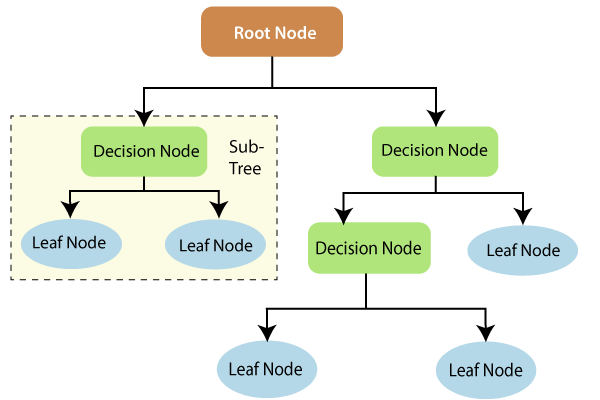

**Decision tree:**

Decision tree is a type of supervised learning algorithm (having a predefined target variable) that is mostly used in classification problems. 

It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables.

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node.

 It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network.

Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data.

The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.

How does the Decision Tree algorithm work?
The basic idea behind any decision tree algorithm is as follows:

1. Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Starts tree building by repeating this process recursively for each child until one of the condition will match:
4. All the tuples belong to the same attribute value.
5. There are no more remaining attributes.
6. There are no more instances

# **Step II: One-Vs-One Model Building**

**Building the model with first_type of dataframe(df_type1**

# **Predicting on train set - Decision Tree**

In [ ]:
train_dt1_x = df1_trainX.copy()
train_dt1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
3854,1,1,0.281690,1,0.357143,1,0.75,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6351,1,1,0.915493,1,0.500000,1,0.00,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1962,0,0,0.211268,1,0.500000,1,0.25,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2415,1,0,0.112676,1,0.928571,1,0.25,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1256,1,1,0.436620,1,0.000000,1,0.25,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
train_dt1_y = df1_trainY.copy()
train_dt1_y.head()

3854    A
6351    D
1962    C
2415    D
1256    B
Name: Segmentation, dtype: object

In [ ]:
# importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

# creating the decision tree function
model_dt1 = DecisionTreeClassifier(random_state=10,criterion='gini')

#fitting the model
model_dt1.fit(train_dt1_x, train_dt1_y)

# depth of the decision tree
print('Depth of the Decision Tree: ', model_dt1.get_depth())

#checking the training score
print('Accuracy on training: ',model_dt1.score(train_dt1_x, train_dt1_y))

# predict the target on the train dataset
yhat1 = model_dt1.predict(train_dt1_x)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(train_dt1_y.values, yhat1, labels=["A","B","C","D"])
print('-------The confusion matrix for this model is-------')
print(cm1)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_dt1_y.values, yhat1))

Depth of the Decision Tree:  27
Accuracy on training:  0.9623713170039049
-------The confusion matrix for this model is-------
[[1363    7    5    0]
 [  51 1238    9    0]
 [  26   56 1293    3]
 [  21   17   17 1528]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           A       0.93      0.99      0.96      1375
           B       0.94      0.95      0.95      1298
           C       0.98      0.94      0.96      1378
           D       1.00      0.97      0.98      1583

    accuracy                           0.96      5634
   macro avg       0.96      0.96      0.96      5634
weighted avg       0.96      0.96      0.96      5634



In [ ]:
X1 = train_dt1_x.copy()
y1 = pd.DataFrame({'Seg':train_dt1_y})
y1['Seg'] = y1['Seg'].replace(('A','B','C','D'),(1,2,3,4))

In [ ]:
# Implementing grid search

parameter_grid = {
    'max_depth' : [24,25,26,27,28,29,30],
    'max_features': [0.3, 0.5, 0.7]
    }


In [ ]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=model_dt1, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=5)

gridsearch.fit(X1, y1)

print(gridsearch.best_params_)

{'max_depth': 27, 'max_features': 0.7}


In [ ]:
# Implementing random search

parameter_grid = {
    'max_depth' : [24,25,26,27,28,29,30],
    'max_features': [0.3, 0.5, 0.7,0.9]
    }

from sklearn.model_selection import RandomizedSearchCV

randomsearch = RandomizedSearchCV(estimator=model_dt1, param_distributions=parameter_grid, n_iter= 10, cv=5)
randomsearch.fit(X1, y1)

print(randomsearch.best_params_)


{'max_features': 0.9, 'max_depth': 24}


In [ ]:
# final model
model_dt1 = DecisionTreeClassifier(max_depth=26, max_features=0.9 ,random_state=10)

# fitting the model
model_dt1.fit(train_dt1_x, train_dt1_y)

# Training score
print(model_dt1.score(train_dt1_x, train_dt1_y).round(4))

0.9618


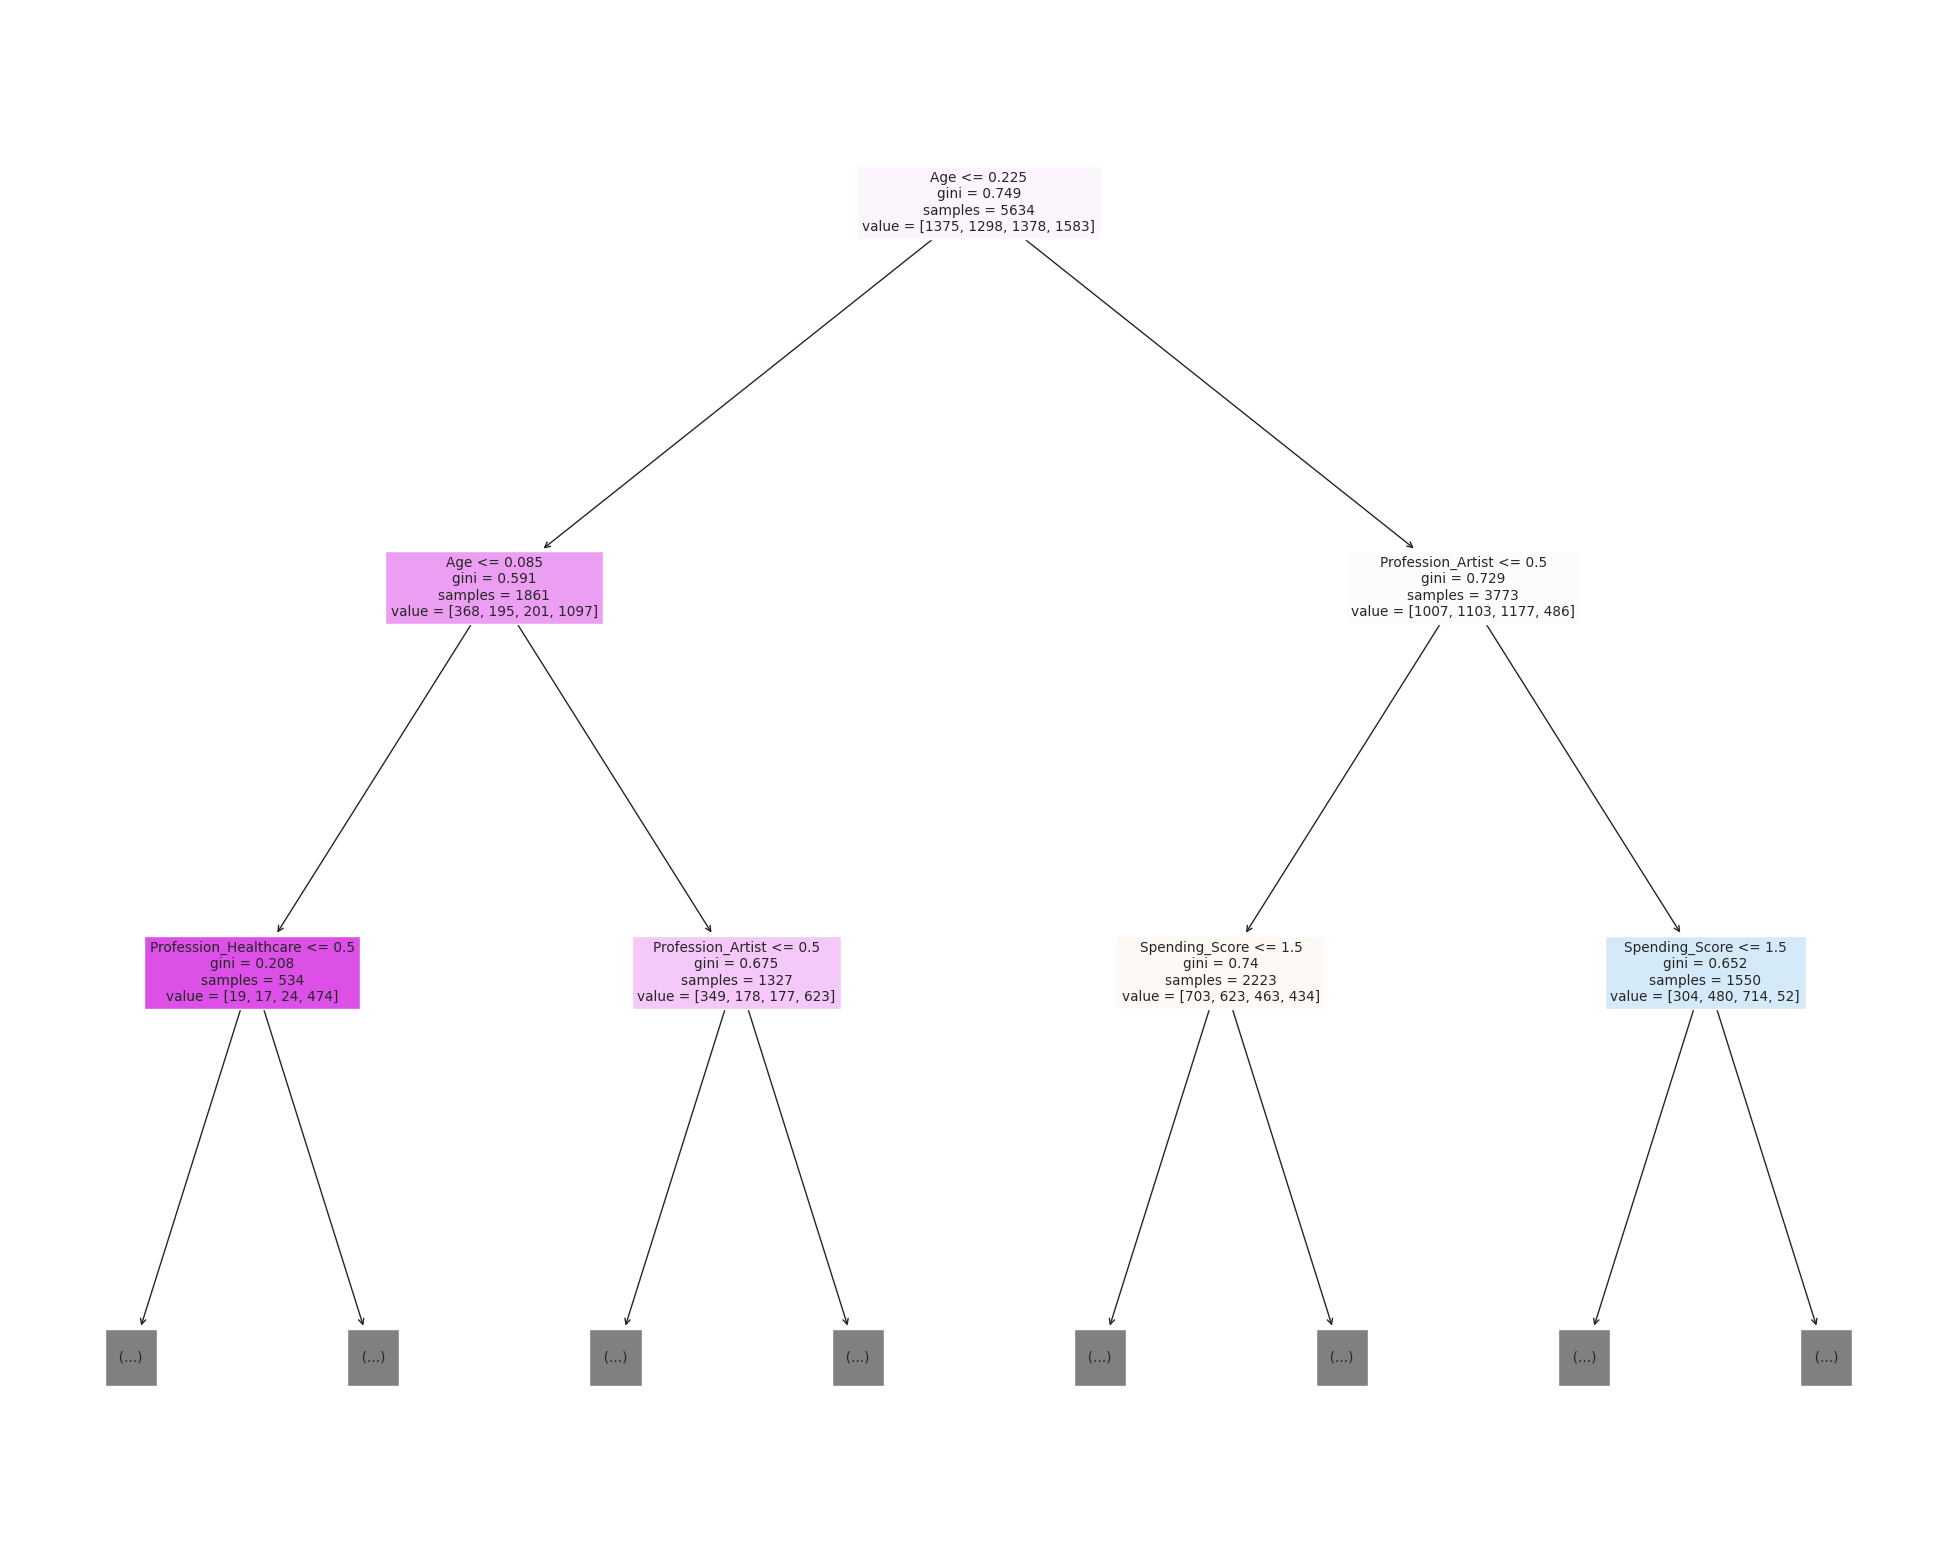

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_dt1, feature_names=train_dt1_x.columns, max_depth=2, filled=True)

# **Predicting on test set - Decision Tree**

In [ ]:
test_dt1_x = df1_testX.copy()
test_dt1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
5579,0,1,0.478873,1,0.071429,2,0.500,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7375,1,0,0.042254,0,0.071429,1,0.500,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6807,1,0,0.183099,0,0.000000,1,0.625,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4359,1,1,0.605634,1,0.000000,1,0.000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4390,1,1,0.830986,1,0.000000,1,0.000,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
test_dt1_y = df1_testY.copy()
test_dt1_y.head()

5579    B
7375    D
6807    D
4359    B
4390    A
Name: Segmentation, dtype: object

In [ ]:
y_dt1 = model_dt1.predict(test_dt1_x)
y_dt1

array(['B', 'D', 'B', ..., 'B', 'C', 'C'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_dt1_y.values, y_dt1, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_dt1_y.values, y_dt1))

-------The confusion matrix for test data is-------

[[196 143 105 146]
 [141 183 177  56]
 [109 182 250  49]
 [134  73  74 397]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           A       0.34      0.33      0.34       590
           B       0.31      0.33      0.32       557
           C       0.41      0.42      0.42       590
           D       0.61      0.59      0.60       678

    accuracy                           0.42      2415
   macro avg       0.42      0.42      0.42      2415
weighted avg       0.43      0.42      0.43      2415



In [ ]:
pd.Series(y_dt1).value_counts()

D    648
C    606
B    581
A    580
dtype: int64

**Building the model with second type of dataframe(df_type2)**


In [ ]:
train_dt2_x = df2_trainX.copy()
train_dt2_x.head()

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
3854,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
6351,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1962,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2415,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1256,1,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
train_dt2_y = df2_trainY.copy()
train_dt2_y.head()

3854    A
6351    D
1962    C
2415    D
1256    B
Name: Segmentation, dtype: object

In [ ]:
 #importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

# creating the decision tree function
model_dt2 = DecisionTreeClassifier(random_state=10,criterion='gini')

#fitting the model
model_dt2.fit(train_dt2_x, train_dt2_y)

# depth of the decision tree
print('Depth of the Decision Tree: ', model_dt2.get_depth())

#checking the training score
print('Accuracy on training: ',model_dt2.score(train_dt2_x, train_dt2_y))

# predict the target on the train dataset
yhat2 = model_dt2.predict(train_dt2_x)

from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(train_dt2_y.values, yhat2, labels=["A","B","C","D"])
print('-------The confusion matrix for this model is-------')
print(cm2)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_dt2_y.values, yhat2))

Depth of the Decision Tree:  23
Accuracy on training:  0.7218672346467874
-------The confusion matrix for this model is-------
[[1075  142   73   85]
 [ 236  800  199   63]
 [ 145  225  938   70]
 [ 203   78   48 1254]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           A       0.65      0.78      0.71      1375
           B       0.64      0.62      0.63      1298
           C       0.75      0.68      0.71      1378
           D       0.85      0.79      0.82      1583

    accuracy                           0.72      5634
   macro avg       0.72      0.72      0.72      5634
weighted avg       0.73      0.72      0.72      5634



In [ ]:
X2 = train_dt2_x.copy()
y2 = pd.DataFrame({'Seg':train_dt2_y})
y2['Seg'] = y2['Seg'].replace(('A','B','C','D'),(1,2,3,4))

In [ ]:
# Implementing grid search

parameter_grid = {
    'max_depth' : [24,25,26,27,28,29,30],
    'max_features': [0.3, 0.5, 0.7]
    }

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=model_dt2, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=5)

gridsearch.fit(X2, y2)

print(gridsearch.best_params_)

{'max_depth': 25, 'max_features': 0.7}


In [ ]:
parameter_grid = {
    'max_depth' : [24,25,26,27,28,29,30],
    'max_features': [0.3, 0.5, 0.7,0.9]
    }

from sklearn.model_selection import RandomizedSearchCV

randomsearch = RandomizedSearchCV(estimator=model_dt2, param_distributions=parameter_grid, n_iter= 10, cv=5)
randomsearch.fit(X2, y2)

print(randomsearch.best_params_)

{'max_features': 0.7, 'max_depth': 25}


In [ ]:
# final model
model_dt2 = DecisionTreeClassifier(max_depth=25, max_features=0.7, random_state=10)

#fitting the model
model_dt2.fit(train_dt2_x, train_dt2_y)

#Training score
print(model_dt2.score(train_dt2_x, train_dt2_y).round(4))

0.7219


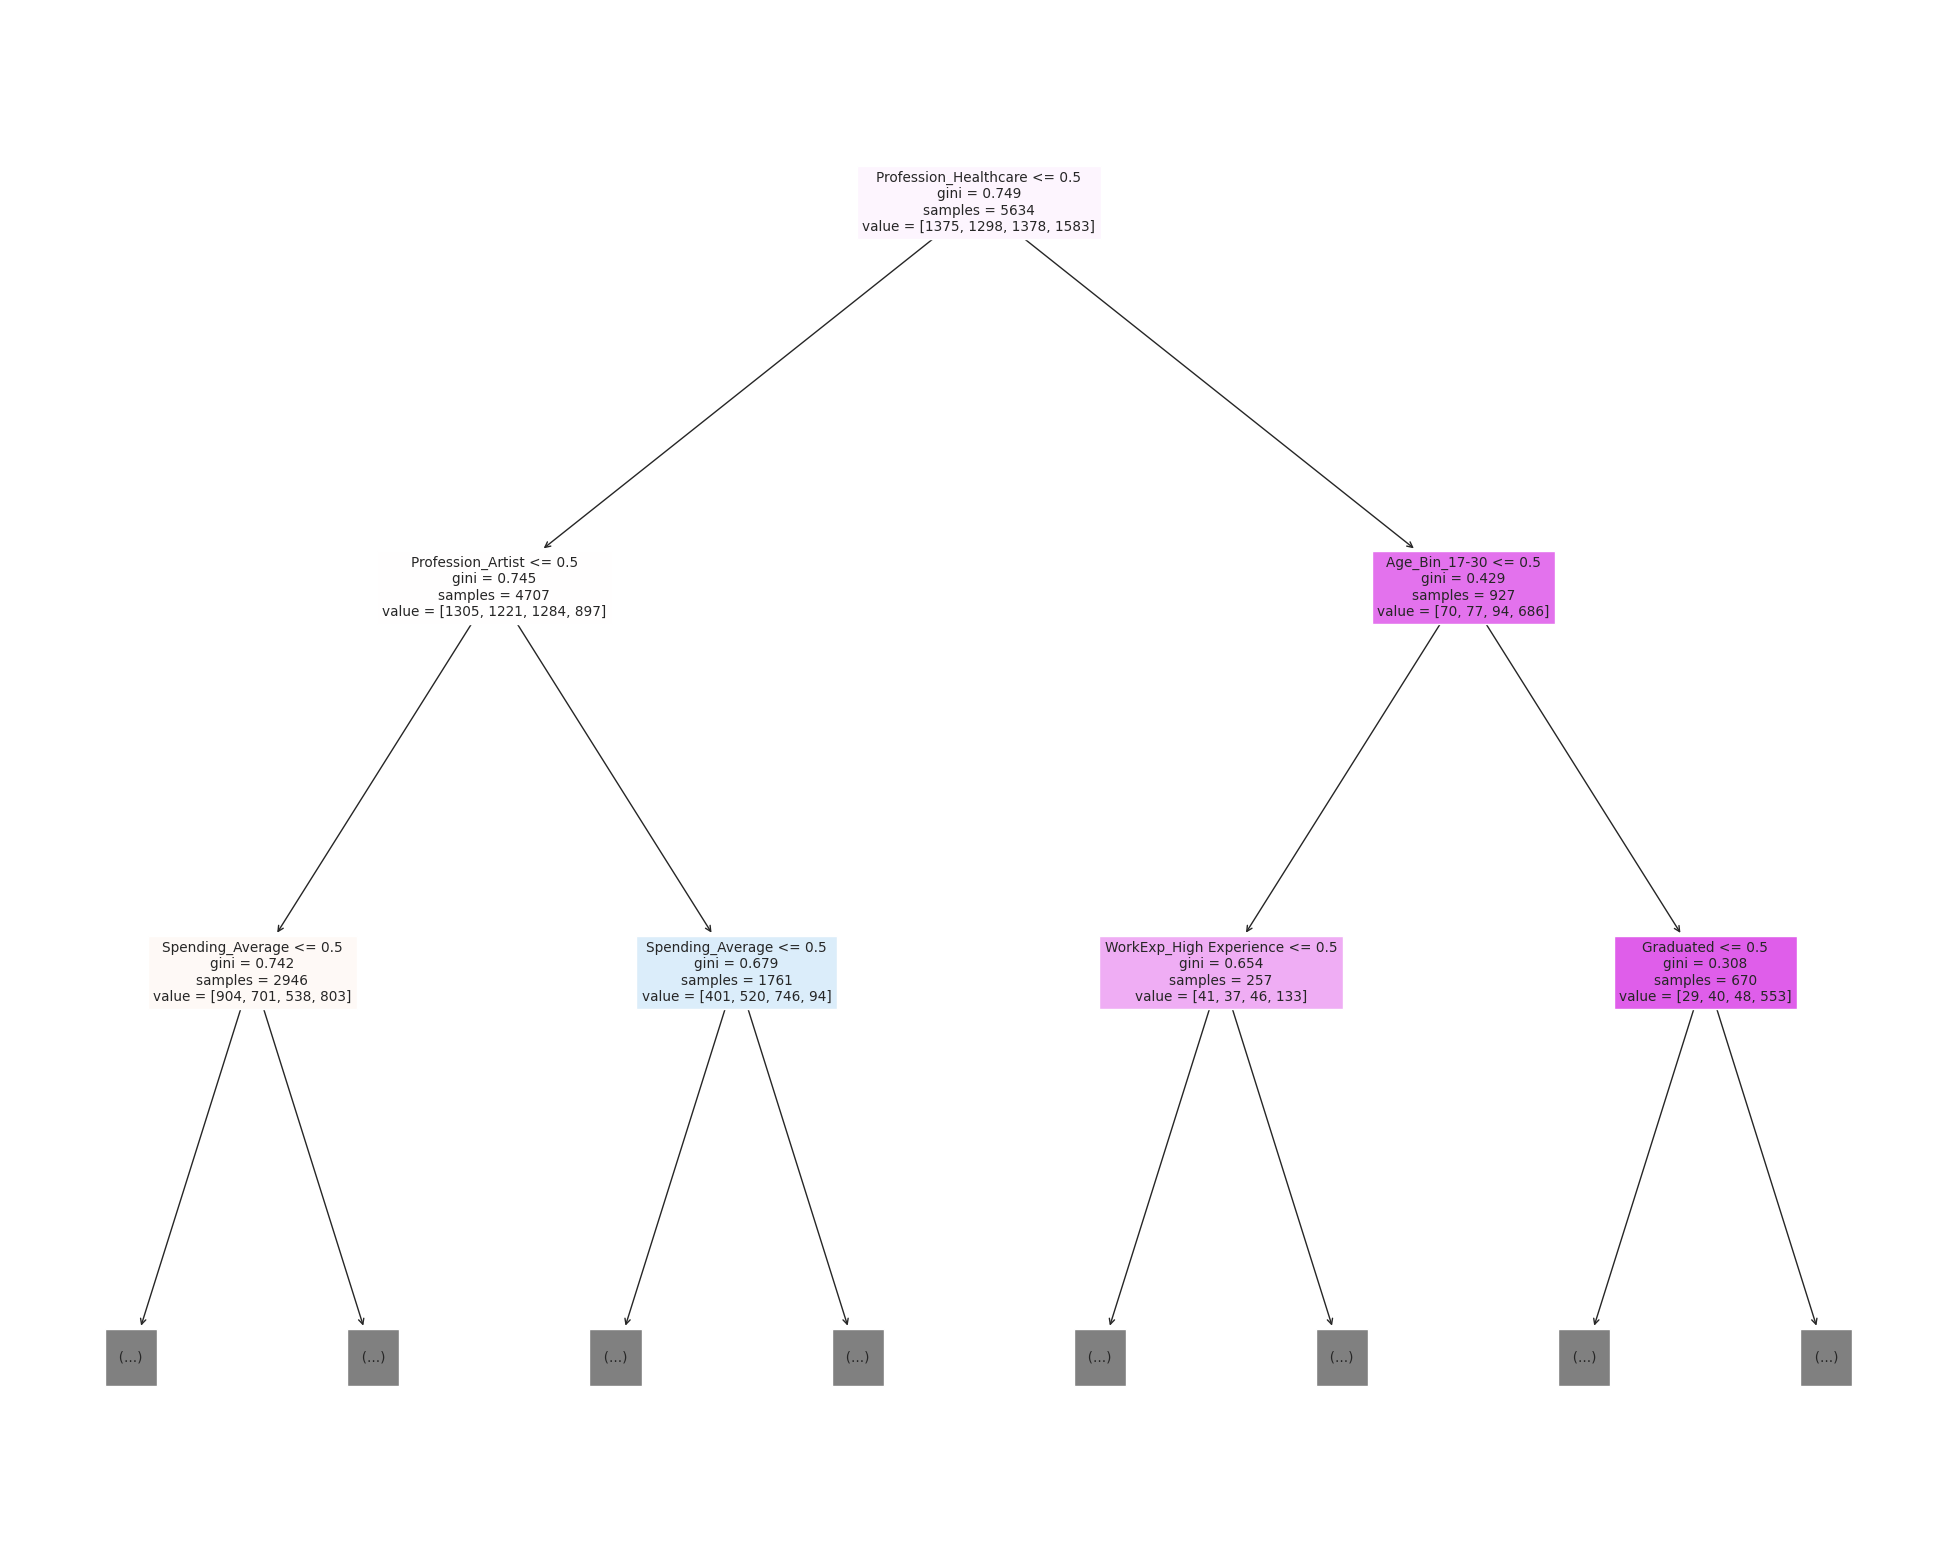

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_dt2, feature_names=train_dt2_x.columns, max_depth=2, filled=True)

# **Predicting on test set - dataframe2**

In [ ]:
test_dt2_x = df2_testX.copy()
test_dt2_x.head

<bound method NDFrame.head of       Gender  Ever_Married  Graduated  Age_Bin_17-30  Age_Bin_31-45  \
5579       0             1          1              0              0   
7375       1             0          0              1              0   
6807       1             0          0              0              1   
4359       1             1          1              0              0   
4390       1             1          1              0              0   
...      ...           ...        ...            ...            ...   
7903       0             1          0              1              0   
3919       0             0          1              1              0   
380        1             1          0              0              1   
689        0             0          1              1              0   
5994       0             1          1              0              0   

      Age_Bin_46-60  Age_Bin_60+  Profession_Artist  Profession_Doctor  \
5579              1            0           

In [ ]:
test_dt2_y = df2_testY.copy()
test_dt2_y.head()

5579    B
7375    D
6807    D
4359    B
4390    A
Name: Segmentation, dtype: object

In [ ]:
y_dt2 = model_dt2.predict(test_dt2_x)
y_dt2

array(['A', 'D', 'B', ..., 'B', 'A', 'C'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------')
print(confusion_matrix(test_dt2_y.values, y_dt2, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------')
print(classification_report(test_dt2_y.values, y_dt2))

-------The confusion matrix for test data is-------
[[241 136  79 134]
 [136 195 159  67]
 [ 96 145 273  76]
 [168  65  39 406]]


-------Printing the report of test data-------
              precision    recall  f1-score   support

           A       0.38      0.41      0.39       590
           B       0.36      0.35      0.36       557
           C       0.50      0.46      0.48       590
           D       0.59      0.60      0.60       678

    accuracy                           0.46      2415
   macro avg       0.46      0.46      0.46      2415
weighted avg       0.46      0.46      0.46      2415



In [ ]:
pd.Series(y_dt2).value_counts()

D    683
A    641
C    550
B    541
dtype: int64


# **Step III: Model Evaluation - Decision Tree**

In [ ]:
print('************************  MODEL-1 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_dt1_y.values, yhat1))
print('\nTest data')
print(classification_report(test_dt1_y.values, y_dt1))

************************  MODEL-1 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           A       0.93      0.99      0.96      1375
           B       0.94      0.95      0.95      1298
           C       0.98      0.94      0.96      1378
           D       1.00      0.97      0.98      1583

    accuracy                           0.96      5634
   macro avg       0.96      0.96      0.96      5634
weighted avg       0.96      0.96      0.96      5634


Test data
              precision    recall  f1-score   support

           A       0.34      0.33      0.34       590
           B       0.31      0.33      0.32       557
           C       0.41      0.42      0.42       590
           D       0.61      0.59      0.60       678

    accuracy                           0.42      2415
   macro avg       0.42      0.42      0.42      2415
weighted avg       0.43      0.42      0.43      2415



In [ ]:
print('************************  MODEL-2 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_dt2_y.values, yhat2))
print('\nTest data')
print(classification_report(test_dt2_y.values, y_dt2))

************************  MODEL-2 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           A       0.65      0.78      0.71      1375
           B       0.64      0.62      0.63      1298
           C       0.75      0.68      0.71      1378
           D       0.85      0.79      0.82      1583

    accuracy                           0.72      5634
   macro avg       0.72      0.72      0.72      5634
weighted avg       0.73      0.72      0.72      5634


Test data
              precision    recall  f1-score   support

           A       0.38      0.41      0.39       590
           B       0.36      0.35      0.36       557
           C       0.50      0.46      0.48       590
           D       0.59      0.60      0.60       678

    accuracy                           0.46      2415
   macro avg       0.46      0.46      0.46      2415
weighted avg       0.46      0.46      0.46      2415



**Observations**

1. It is clearly seen that model-1 is far better than model-2.
2. But the point here to note that there are 2327 entries which are common in train-test data i.e. 2327 test entries(out of total 2627) are already in train data and when we see the result on test set model-1 gave 57% accuracy while model-2 gave 63%. Plus other metrices like precision, recall and f1-score of model-2 are much better than model-1.
3. So we can conclude that **df_type2** is a better data for model building in Decision Tree technique.

# **IV. Random Forest**

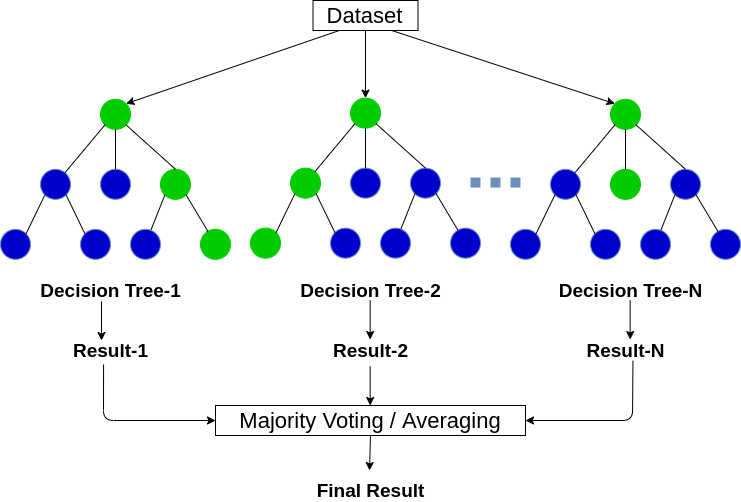

**Random forest:**

Random forest is a supervised learning algorithm. 

It has two variations – one is used for classification problems and other is used for regression problems. 

It is one of the most flexible and easy to use algorithm. It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. 

Random forest algorithm combines multiple decision-trees, resulting in a forest of trees, hence the name Random Forest. In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.

**It works in four steps:**

1. Select random samples from a given dataset.
2. Construct a decision tree for each sample and get a prediction result from each decision tree.
3. Perform a vote for each predicted result.
4. Select the prediction result with the most votes as the final prediction.

**Difference between Decision Tree and Random Forest**

The decision tree algorithm and ranandom forest algorithm have some differences. Here we will annotate Some salient features of comparison as follows:-

Random forests is a set of multiple decision-trees.
Decision-trees are computationally faster as compared to random forests.

Deep decision-trees may suffer from overfitting. Random forest prevents overfitting by creating trees on random forests.

Random forest is difficult to interpret. But, a decision-tree is easily interpretable and can be converted to rules.

**Relationship of Random forest algorithm to nearest neighbour**

A relationship between random forests and the k-nearest neighbours algorithm was pointed out by Lin and Jeon in 2002. 

It turns out that both can be viewed as so-called weighted neighbourhoods schemes. 

These are models built from a training set that make predictions for new points by looking at the neighbourhood of the point, formalized by a weight function.

# **Step II: Model Building - Random Forest**

**Building the model with first type of dataframe(df_type1**

In [ ]:
train_rf1_x = df1_trainX.copy()
train_rf1_x.head()


,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
3854,1,1,0.281690,1,0.357143,1,0.75,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6351,1,1,0.915493,1,0.500000,1,0.00,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1962,0,0,0.211268,1,0.500000,1,0.25,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2415,1,0,0.112676,1,0.928571,1,0.25,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1256,1,1,0.436620,1,0.000000,1,0.25,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
train_rf1_y = df1_trainY.copy()
train_rf1_y.head()

3854    A
6351    D
1962    C
2415    D
1256    B
Name: Segmentation, dtype: object

In [ ]:
# Importing the library
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier with 20 decision tree
rfc1 = RandomForestClassifier(random_state=0,n_estimators=20)

# Train model
model_rfc1 = rfc1.fit(train_rf1_x, train_rf1_y)

# Predicting the classes
yhat3 = rfc1.predict(train_rf1_x)

# view the feature scores
feature_scores = pd.Series(rfc1.feature_importances_, index=train_rf1_x.columns).sort_values(ascending=False)
print('The importance of features ranked from high to low:\n',feature_scores)

from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(train_rf1_y.values, yhat3, labels=["A","B","C","D"])
print('\n\n-------The confusion matrix for this model is-------')
print(cm3)

The importance of features ranked from high to low:
 Age                         0.355291
Work_Experience             0.151862
Family_Size                 0.115397
Spending_Score              0.060470
Profession_Healthcare       0.040821
Graduated                   0.037803
Profession_Artist           0.034635
Gender                      0.033496
Ever_Married                0.025161
Var_1_Cat_6                 0.021046
Var_1_Cat_4                 0.016275
Var_1_Cat_3                 0.014460
Profession_Entertainment    0.013830
Profession_Doctor           0.012181
Profession_Engineer         0.012083
Var_1_Cat_2                 0.010084
Profession_Marketing        0.008606
Profession_Executive        0.007929
Var_1_Cat_7                 0.007259
Profession_Homemaker        0.006916
Profession_Lawyer           0.005824
Var_1_Cat_1                 0.005067
Var_1_Cat_5                 0.003504
dtype: float64


-------The confusion matrix for this model is-------
[[1320   32   15    8]
 [ 

In [ ]:
from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_rf1_y.values, yhat3))



-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           A       0.95      0.96      0.96      1375
           B       0.94      0.94      0.94      1298
           C       0.95      0.95      0.95      1378
           D       0.98      0.98      0.98      1583

    accuracy                           0.96      5634
   macro avg       0.96      0.96      0.96      5634
weighted avg       0.96      0.96      0.96      5634



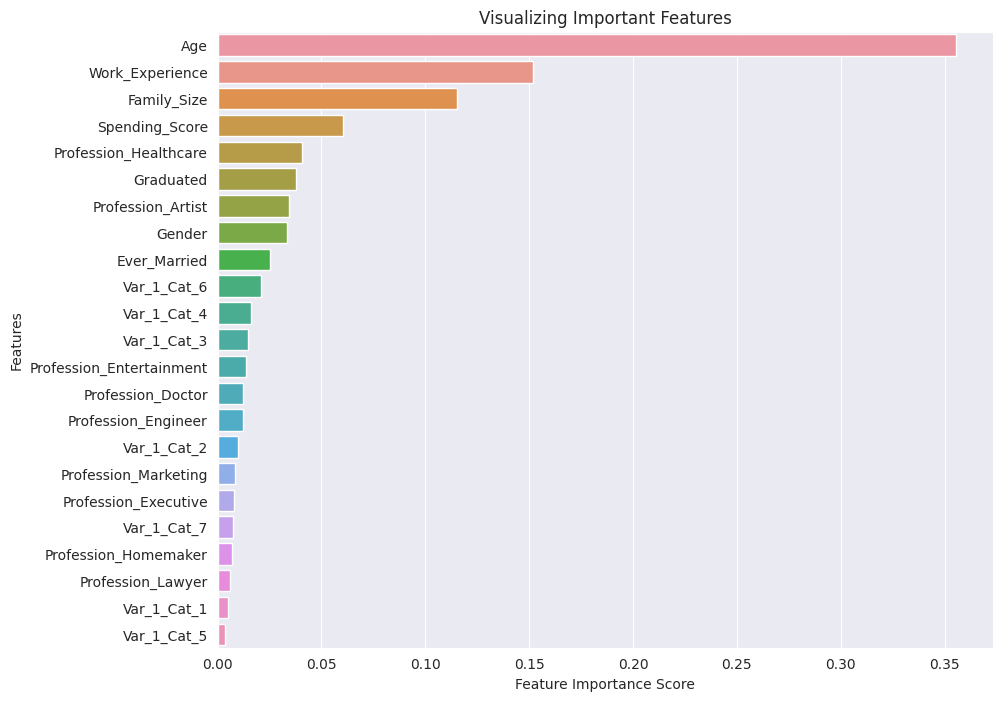

In [ ]:
# Creating bar plot of scores of variables importance
plt.figure(figsize=(10,8))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# **Predicting on test set - Random Forest**


In [ ]:
test_rf1_x = df1_testX.copy()
test_rf1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
5579,0,1,0.478873,1,0.071429,2,0.500,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7375,1,0,0.042254,0,0.071429,1,0.500,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6807,1,0,0.183099,0,0.000000,1,0.625,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4359,1,1,0.605634,1,0.000000,1,0.000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4390,1,1,0.830986,1,0.000000,1,0.000,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
test_rf1_y = df1_testY.copy()
test_rf1_y.head()

5579    B
7375    D
6807    D
4359    B
4390    A
Name: Segmentation, dtype: object

In [ ]:
y_rf1 = rfc1.predict(test_rf1_x)
y_rf1

array(['B', 'D', 'B', ..., 'A', 'D', 'C'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_rf1_y.values, y_rf1, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_rf1_y.values, y_rf1))

-------The confusion matrix for test data is-------

[[239 135  91 125]
 [130 183 174  70]
 [ 84 150 275  81]
 [131  53  43 451]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           A       0.41      0.41      0.41       590
           B       0.35      0.33      0.34       557
           C       0.47      0.47      0.47       590
           D       0.62      0.67      0.64       678

    accuracy                           0.48      2415
   macro avg       0.46      0.47      0.46      2415
weighted avg       0.47      0.48      0.47      2415



**Building the model with second type of dataframe(df_type2)**

In [ ]:
train_rf2_x = df2_trainX.copy()
train_rf2_x.head()

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
3854,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
6351,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1962,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2415,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1256,1,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
train_rf2_y = df2_trainY.copy()
train_rf2_y.head()

3854    A
6351    D
1962    C
2415    D
1256    B
Name: Segmentation, dtype: object

In [ ]:
 #Importing the library
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier with 20 decision tree
rfc2 = RandomForestClassifier(random_state=0,n_estimators=20)

# Train model
model_rfc2 = rfc2.fit(train_rf2_x, train_rf2_y)

# Predicting the classes
yhat4 = rfc2.predict(train_rf2_x)

# view the feature scores
feature_scores = pd.Series(rfc2.feature_importances_, index=train_rf2_x.columns).sort_values(ascending=False)
print('The importance of features ranked from high to low:\n',feature_scores)

from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(train_rf2_y.values, yhat4, labels=["A","B","C","D"])
print('\n\n-------The confusion matrix for this model is-------')
print(cm4)

The importance of features ranked from high to low:
 Graduated                    0.077635
Gender                       0.075573
Age_Bin_17-30                0.069896
Profession_Artist            0.058893
Ever_Married                 0.056437
Spending_Low                 0.049941
Profession_Healthcare        0.048923
Var_1_Cat_6                  0.037790
WorkExp_Low Experience       0.035812
WorkExp_Medium Experience    0.031856
Age_Bin_31-45                0.031792
WorkExp_High Experience      0.030483
Profession_Entertainment     0.030328
Var_1_Cat_4                  0.029880
Spending_Average             0.029363
Var_1_Cat_3                  0.027745
Age_Bin_46-60                0.027197
Profession_Doctor            0.027044
Profession_Engineer          0.023593
FamilySize_Small Family      0.021743
Var_1_Cat_2                  0.021569
FamilySize_Big Family        0.019932
Age_Bin_60+                  0.018720
Profession_Marketing         0.017578
Profession_Executive         0.0170

In [ ]:
from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_rf2_y.values, yhat4))



-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           A       0.69      0.70      0.69      1375
           B       0.63      0.61      0.62      1298
           C       0.72      0.70      0.71      1378
           D       0.81      0.84      0.83      1583

    accuracy                           0.72      5634
   macro avg       0.71      0.71      0.71      5634
weighted avg       0.72      0.72      0.72      5634



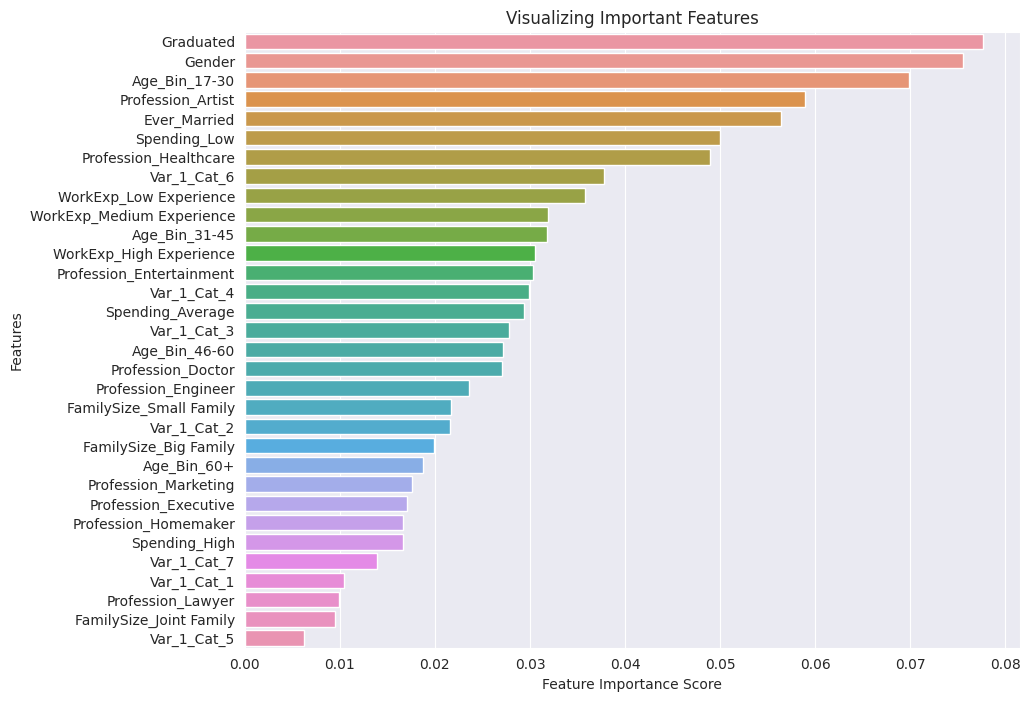

In [ ]:
# Creating bar plot of scores of variables importance
plt.figure(figsize=(10,8))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# **Predicting on test set - Random Forest**

In [ ]:
test_rf2_x = df2_testX.copy()
test_rf2_x.head()

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
5579,0,1,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
7375,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6807,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4359,1,1,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4390,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
test_rf2_y = df2_testY.copy()
test_rf2_y.head()

5579    B
7375    D
6807    D
4359    B
4390    A
Name: Segmentation, dtype: object

In [ ]:
y_rf2 = rfc2.predict(test_rf2_x)
y_rf2

array(['B', 'D', 'B', ..., 'B', 'D', 'C'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_rf2_y.values, y_rf2, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_rf2_y.values, y_rf2))

-------The confusion matrix for test data is-------

[[219 131  82 158]
 [123 187 166  81]
 [ 79 141 285  85]
 [136  57  43 442]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           A       0.39      0.37      0.38       590
           B       0.36      0.34      0.35       557
           C       0.49      0.48      0.49       590
           D       0.58      0.65      0.61       678

    accuracy                           0.47      2415
   macro avg       0.46      0.46      0.46      2415
weighted avg       0.46      0.47      0.46      2415



In [ ]:
pd.Series(y_rf2).value_counts()

D    766
C    576
A    557
B    516
dtype: int64


# **Step III: Model Evaluation - Random forest**


In [ ]:
print('************************  MODEL-1 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_rf1_y.values, yhat3))
print('\nTest data')
print(classification_report(test_rf1_y.values, y_rf1))

************************  MODEL-1 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           A       0.95      0.96      0.96      1375
           B       0.94      0.94      0.94      1298
           C       0.95      0.95      0.95      1378
           D       0.98      0.98      0.98      1583

    accuracy                           0.96      5634
   macro avg       0.96      0.96      0.96      5634
weighted avg       0.96      0.96      0.96      5634


Test data
              precision    recall  f1-score   support

           A       0.41      0.41      0.41       590
           B       0.35      0.33      0.34       557
           C       0.47      0.47      0.47       590
           D       0.62      0.67      0.64       678

    accuracy                           0.48      2415
   macro avg       0.46      0.47      0.46      2415
weighted avg       0.47      0.48      0.47      2415



In [ ]:
print('************************  MODEL-2 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_rf2_y.values, yhat4))
print('\nTest data')
print(classification_report(test_rf2_y.values, y_rf2))

************************  MODEL-2 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           A       0.69      0.70      0.69      1375
           B       0.63      0.61      0.62      1298
           C       0.72      0.70      0.71      1378
           D       0.81      0.84      0.83      1583

    accuracy                           0.72      5634
   macro avg       0.71      0.71      0.71      5634
weighted avg       0.72      0.72      0.72      5634


Test data
              precision    recall  f1-score   support

           A       0.39      0.37      0.38       590
           B       0.36      0.34      0.35       557
           C       0.49      0.48      0.49       590
           D       0.58      0.65      0.61       678

    accuracy                           0.47      2415
   macro avg       0.46      0.46      0.46      2415
weighted avg       0.46      0.47      0.46      2415



# **Observations - Random Forest**

1. It is clearly seen that model-1 is far better than model-2.
2. But the point here to note that there are 2327 entries which are common in train-test data i.e. 2327 test entries(out of total 2627) are already in train data and when we see the result on test set model-1 gave 69% accuracy while model-2 gave 64%.
3. A drop from 95% train accuracy to 69% test accuracy in model-1 shows that it overfit the train data while in model-2 69% of train accuracy and 64% of test accuracy gives a balaced trade-off.
4. So we can conclude that df_type2 is a better data for model building in Random Forest technique.

# **V. k-Nearest Neighbour (k-NN)**

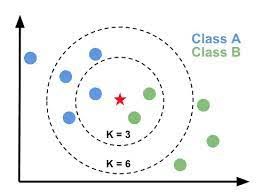

**k-Nearest Neighbour (k-NN:)**

KNN is a non-parametric and lazy learning algorithm.

Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. 

This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions.

Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier. Costly testing phase means time and memory. 

In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.
KNN performs better with a lower number of features than a large number of features.

 You can say that when the number of features increases than it requires more data. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. 
 
 This problem of higher dimension is known as the Curse of Dimensionality.

**Steps to perform The KNN Algorithm**

1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data
4. Calculate the distance between the query example and the current example from the data.
5. Add the distance and the index of the example to an ordered collection
Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
6. Pick the first K entries from the sorted collection
7. Get the labels of the selected K entries
8. If regression, return the mean of the K labels
9. If classification, return the mode of the K labels


# **Step II: Model Building - k-Nearest Neighbour (k-NN)**

**Building the model with first_type of dataframe(df_type1)**

In [ ]:
train_knn1_x = df1_trainX.copy()
train_knn1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
3854,1,1,0.281690,1,0.357143,1,0.75,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6351,1,1,0.915493,1,0.500000,1,0.00,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1962,0,0,0.211268,1,0.500000,1,0.25,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2415,1,0,0.112676,1,0.928571,1,0.25,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1256,1,1,0.436620,1,0.000000,1,0.25,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
train_knn1_y = df1_trainY.copy()
train_knn1_y.head()

3854    A
6351    D
1962    C
2415    D
1256    B
Name: Segmentation, dtype: object

In [ ]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model
model_knn1 = KNeighborsClassifier(n_neighbors=3)

#fitting the model
model_knn1.fit(train_knn1_x, train_knn1_y)

#checking the training score
print('Accuracy on training: ',model_knn1.score(train_knn1_x, train_knn1_y))

# predict the target on the train dataset
yhat1 = model_knn1.predict(train_knn1_x)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(train_knn1_y.values, yhat1, labels=["A","B","C","D"])
print('-------The confusion matrix for this model is-------')
print(cm1)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_knn1_y.values, yhat1))

Accuracy on training:  0.6842385516506923
-------The confusion matrix for this model is-------
[[1091  106   63  115]
 [ 355  712  171   60]
 [ 266  164  889   59]
 [ 282  107   31 1163]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           A       0.55      0.79      0.65      1375
           B       0.65      0.55      0.60      1298
           C       0.77      0.65      0.70      1378
           D       0.83      0.73      0.78      1583

    accuracy                           0.68      5634
   macro avg       0.70      0.68      0.68      5634
weighted avg       0.71      0.68      0.69      5634



In [ ]:
# Function for checking the optimal number of k
train_accuracy = []
for k in range(1,11):
    model_knn1 = KNeighborsClassifier(n_neighbors=k)
    model_knn1.fit(train_knn1_x, train_knn1_y)
    train_accuracy.append(model_knn1.score(train_knn1_x, train_knn1_y))

In [ ]:
frame = pd.DataFrame({'no.of k':range(1,11), 'train_acc':train_accuracy})
frame

,no.of k,train_acc
0,1,0.959354
1,2,0.720802
2,3,0.684239
3,4,0.653887
4,5,0.632943
5,6,0.619453
6,7,0.608449
7,8,0.596557
8,9,0.591409
9,10,0.588037


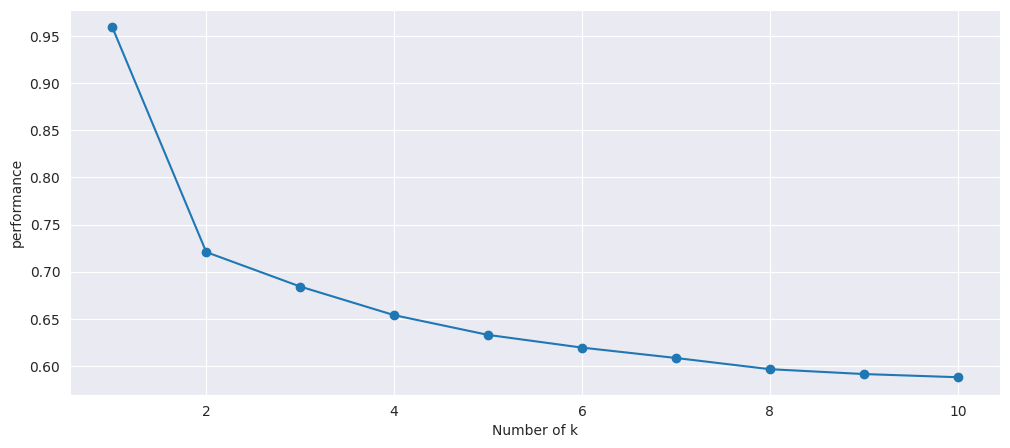

In [ ]:
# Elbow curve
plt.figure(figsize=(12,5))
plt.plot(frame['no.of k'], frame['train_acc'], marker='o')
plt.xlabel('Number of k')
plt.ylabel('performance')
plt.show()

In [ ]:
# final model
model_knn1 = KNeighborsClassifier(n_neighbors=2)

# fitting the model
model_knn1.fit(train_knn1_x, train_knn1_y)

# Training score
print(model_knn1.score(train_knn1_x, train_knn1_y).round(4))

0.7208


# **Predicting on test set - k-NN**

In [ ]:
test_knn1_x = df1_testX.copy()
test_knn1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
5579,0,1,0.478873,1,0.071429,2,0.500,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7375,1,0,0.042254,0,0.071429,1,0.500,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6807,1,0,0.183099,0,0.000000,1,0.625,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4359,1,1,0.605634,1,0.000000,1,0.000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4390,1,1,0.830986,1,0.000000,1,0.000,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
test_knn1_y = df1_testY.copy()
test_knn1_y.head()

5579    B
7375    D
6807    D
4359    B
4390    A
Name: Segmentation, dtype: object

In [ ]:
y_knn1 = model_knn1.predict(test_knn1_x)
y_knn1

array(['A', 'D', 'B', ..., 'B', 'A', 'C'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_knn1_y.values, y_knn1, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_knn1_y.values, y_knn1))

-------The confusion matrix for test data is-------

[[323 155  62  50]
 [220 211 107  19]
 [164 208 185  33]
 [222 101  60 295]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           A       0.35      0.55      0.43       590
           B       0.31      0.38      0.34       557
           C       0.45      0.31      0.37       590
           D       0.74      0.44      0.55       678

    accuracy                           0.42      2415
   macro avg       0.46      0.42      0.42      2415
weighted avg       0.47      0.42      0.43      2415



**Building the model with second type of dataframe(df_type2)**


In [ ]:
train_knn2_x = df2_trainX.copy()
train_knn2_x.head()

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
3854,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
6351,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1962,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2415,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1256,1,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
train_knn2_y = df2_trainY.copy()
train_knn2_y.head()

3854    A
6351    D
1962    C
2415    D
1256    B
Name: Segmentation, dtype: object

In [ ]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model
model_knn2 = KNeighborsClassifier(n_neighbors=3)

#fitting the model
model_knn2.fit(train_knn2_x, train_knn2_y)

#checking the training score
print('Accuracy on training: ',model_knn2.score(train_knn2_x, train_knn2_y))

# predict the target on the train dataset
yhat2 = model_knn2.predict(train_knn2_x)

from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(train_knn2_y.values, yhat2, labels=["A","B","C","D"])
print('-------The confusion matrix for this model is-------')
print(cm2)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_knn2_y.values, yhat2))

Accuracy on training:  0.592474263400781
-------The confusion matrix for this model is-------
[[ 934  162  145  134]
 [ 393  503  312   90]
 [ 275  205  818   80]
 [ 361   93   46 1083]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           A       0.48      0.68      0.56      1375
           B       0.52      0.39      0.44      1298
           C       0.62      0.59      0.61      1378
           D       0.78      0.68      0.73      1583

    accuracy                           0.59      5634
   macro avg       0.60      0.59      0.58      5634
weighted avg       0.61      0.59      0.59      5634



In [ ]:
# Function to check the optimal number of k
train_accuracy = []
for k in range(1,11):
    model_knn2 = KNeighborsClassifier(n_neighbors=k)
    model_knn2.fit(train_knn2_x, train_knn2_y)
    train_accuracy.append(model_knn2.score(train_knn2_x, train_knn2_y))

In [ ]:
frame = pd.DataFrame({'no.of k':range(1,11), 'train_acc':train_accuracy})
frame

,no.of k,train_acc
0,1,0.654242
1,2,0.569223
2,3,0.592474
3,4,0.598864
4,5,0.589102
5,6,0.587327
6,7,0.584310
7,8,0.577387
8,9,0.574192
9,10,0.570288


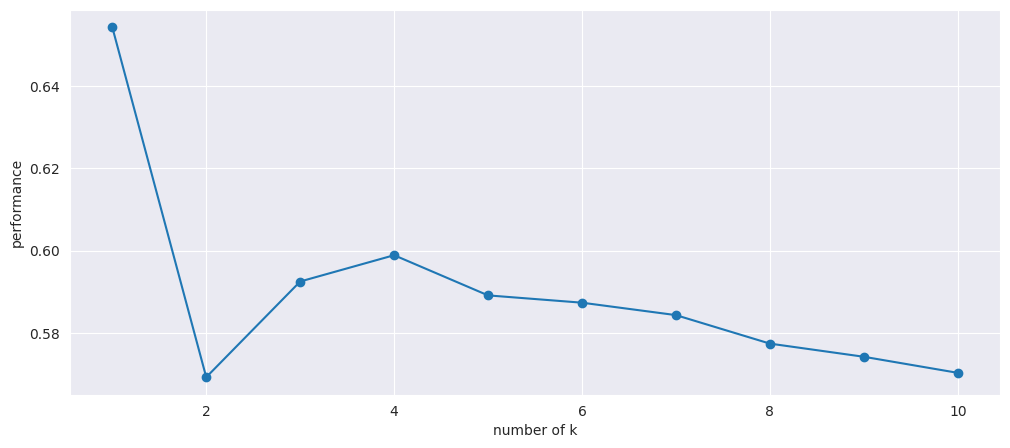

In [ ]:
# Elbow plot
plt.figure(figsize=(12,5))
plt.plot(frame['no.of k'], frame['train_acc'], marker='o')
plt.xlabel('number of k')
plt.ylabel('performance')
plt.show()

In [ ]:
# final model
model_knn2 = KNeighborsClassifier(n_neighbors=3)

#fitting the model
model_knn2.fit(train_knn2_x, train_knn2_y)

#Training score
print(model_knn2.score(train_knn2_x, train_knn2_y).round(4))

0.5925


# **Predicting on test set - k-NN**

In [ ]:
test_knn2_x = df2_testX.copy()
test_knn2_x.head()

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
5579,0,1,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
7375,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6807,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4359,1,1,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4390,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
test_knn2_y = df2_testY.copy()
test_knn2_y.head()

5579    B
7375    D
6807    D
4359    B
4390    A
Name: Segmentation, dtype: object

In [ ]:
y_knn2 = model_knn2.predict(test_knn2_x)
y_knn2

array(['A', 'D', 'B', ..., 'C', 'D', 'C'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------')
print(confusion_matrix(test_knn2_y.values, y_knn2, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------')
print(classification_report(test_knn2_y.values, y_knn2))

-------The confusion matrix for test data is-------
[[271 100  93 126]
 [183 130 183  61]
 [131 115 281  63]
 [193  47  48 390]]


-------Printing the report of test data-------
              precision    recall  f1-score   support

           A       0.35      0.46      0.40       590
           B       0.33      0.23      0.27       557
           C       0.46      0.48      0.47       590
           D       0.61      0.58      0.59       678

    accuracy                           0.44      2415
   macro avg       0.44      0.44      0.43      2415
weighted avg       0.45      0.44      0.44      2415



In [ ]:
pd.Series(y_knn2).value_counts()

A    778
D    640
C    605
B    392
dtype: int64


# **Step III: Model Evaluation - k-NN**

In [ ]:
print('************************  MODEL-1 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_knn1_y.values, yhat1))
print('\nTest data')
print(classification_report(test_knn1_y.values, y_knn1))

************************  MODEL-1 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           A       0.55      0.79      0.65      1375
           B       0.65      0.55      0.60      1298
           C       0.77      0.65      0.70      1378
           D       0.83      0.73      0.78      1583

    accuracy                           0.68      5634
   macro avg       0.70      0.68      0.68      5634
weighted avg       0.71      0.68      0.69      5634


Test data
              precision    recall  f1-score   support

           A       0.35      0.55      0.43       590
           B       0.31      0.38      0.34       557
           C       0.45      0.31      0.37       590
           D       0.74      0.44      0.55       678

    accuracy                           0.42      2415
   macro avg       0.46      0.42      0.42      2415
weighted avg       0.47      0.42      0.43      2415



In [ ]:
print('************************  MODEL-2 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_knn2_y.values, yhat2))
print('\nTest data')
print(classification_report(test_knn2_y.values, y_knn2))

************************  MODEL-2 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           A       0.48      0.68      0.56      1375
           B       0.52      0.39      0.44      1298
           C       0.62      0.59      0.61      1378
           D       0.78      0.68      0.73      1583

    accuracy                           0.59      5634
   macro avg       0.60      0.59      0.58      5634
weighted avg       0.61      0.59      0.59      5634


Test data
              precision    recall  f1-score   support

           A       0.35      0.46      0.40       590
           B       0.33      0.23      0.27       557
           C       0.46      0.48      0.47       590
           D       0.61      0.58      0.59       678

    accuracy                           0.44      2415
   macro avg       0.44      0.44      0.43      2415
weighted avg       0.45      0.44      0.44      2415



# **Observations - k-NN:**
1. It is clearly seen that model-1 is better than model-2 with respect to all the metrices.
2. But the point here to note that there are 2327 entries which are common in train-test data i.e. 2327 test entries(out of total 2627) are already in train data and when we see the result on test set model-1 gave 63% accuracy while model-2 gave 55%.
3. 69% train accuracy with 65% test accuracy is good trade-off by model-1 compared to model-2 which gave 58% train accuracy and 55% test accuracy.
4. So we can conclude that df_type1 is a better data for model building in k-NN technique.

# **VI. Naive Bayes Classifier**

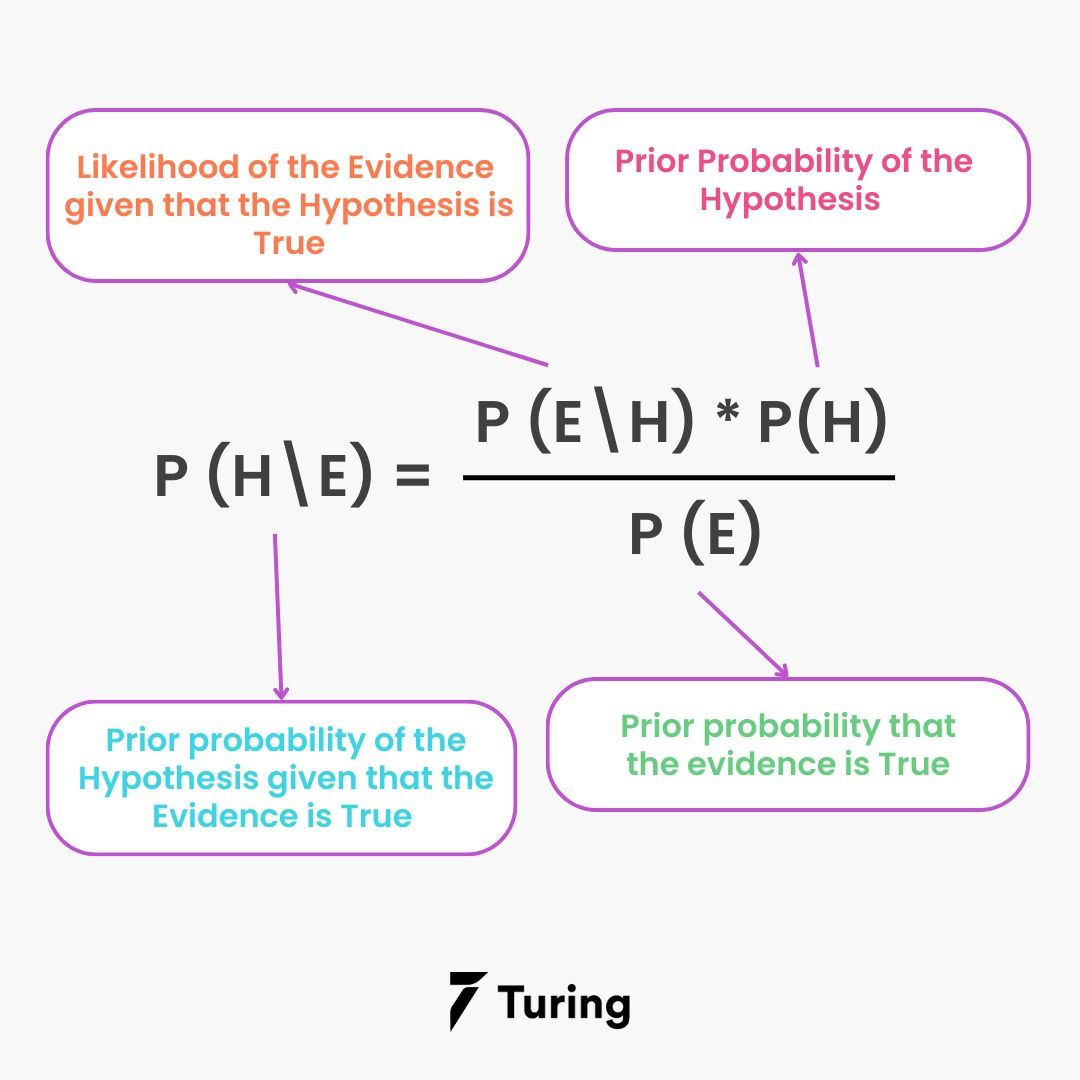

**Naive Bayes Classifier:**


Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and reliable algorithm. 

Naive Bayes classifiers have high accuracy and speed on large datasets.
Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. 

For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently.

This assumption simplifies computation, and that's why it is considered as naive. This assumption is called class conditional independence.
Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.

Naïve Bayes models are also known as simple Bayes or independent Bayes. All these names refer to the application of Bayes’ theorem in the classifier’s decision rule. 

Naïve Bayes classifier applies the Bayes’ theorem in practice. This classifier brings the power of Bayes’ theorem to machine learning.

# **Step II: Model Building - Naive Bayes Classifier**

**Building the model with first type of dataframe(df_type1)**

In [ ]:
train_nb1_x = df1_trainX.copy()
train_nb1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
3854,1,1,0.281690,1,0.357143,1,0.75,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6351,1,1,0.915493,1,0.500000,1,0.00,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1962,0,0,0.211268,1,0.500000,1,0.25,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2415,1,0,0.112676,1,0.928571,1,0.25,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1256,1,1,0.436620,1,0.000000,1,0.25,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
train_nb1_y = df1_trainY.copy()
train_nb1_y.head()

3854    A
6351    D
1962    C
2415    D
1256    B
Name: Segmentation, dtype: object

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb1 = GaussianNB()

# Train model
model_nb1 = gnb1.fit(train_nb1_x, train_nb1_y)

# Predicting the classes
yhat3 = gnb1.predict(train_nb1_x)

from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(train_nb1_y.values, yhat3, labels=["A","B","C","D"])
print('\n\n-------The confusion matrix for this model is-------')
print(cm3)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_nb1_y.values, yhat3))



-------The confusion matrix for this model is-------
[[ 563  122  475  215]
 [ 305  169  664  160]
 [ 178   88  954  158]
 [ 342   71  170 1000]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           A       0.41      0.41      0.41      1375
           B       0.38      0.13      0.19      1298
           C       0.42      0.69      0.52      1378
           D       0.65      0.63      0.64      1583

    accuracy                           0.48      5634
   macro avg       0.46      0.47      0.44      5634
weighted avg       0.47      0.48      0.45      5634



# **Predicting on test set - Naive bayes**

In [ ]:
test_nb1_x = df1_testX.copy()
test_nb1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
5579,0,1,0.478873,1,0.071429,2,0.500,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7375,1,0,0.042254,0,0.071429,1,0.500,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6807,1,0,0.183099,0,0.000000,1,0.625,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4359,1,1,0.605634,1,0.000000,1,0.000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4390,1,1,0.830986,1,0.000000,1,0.000,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
test_nb1_y = df1_testY.copy()
test_nb1_y.head()

5579    B
7375    D
6807    D
4359    B
4390    A
Name: Segmentation, dtype: object

In [ ]:
y_nb1 = gnb1.predict(test_nb1_x)
y_nb1

array(['A', 'D', 'D', ..., 'A', 'D', 'C'], dtype='<U1')

In [ ]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_nb1_y.values, y_nb1, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_nb1_y.values, y_nb1))

-------The confusion matrix for test data is-------

[[207  72 212  99]
 [128  80 297  52]
 [ 61  41 395  93]
 [132  35  70 441]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           A       0.39      0.35      0.37       590
           B       0.35      0.14      0.20       557
           C       0.41      0.67      0.51       590
           D       0.64      0.65      0.65       678

    accuracy                           0.47      2415
   macro avg       0.45      0.45      0.43      2415
weighted avg       0.46      0.47      0.44      2415



In [ ]:
pd.Series(y_nb1).value_counts()

C    974
D    685
A    528
B    228
dtype: int64

**Building the model with second type of dataframe(df_type2)**

In [ ]:
train_nb2_x = df2_trainX.copy()
train_nb2_x.head()

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
3854,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
6351,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1962,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2415,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1256,1,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
train_nb2_y = df2_trainY.copy()
train_nb2_y.head()

3854    A
6351    D
1962    C
2415    D
1256    B
Name: Segmentation, dtype: object

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb2 = GaussianNB()

# Train model
model_nb2 = gnb2.fit(train_nb2_x, train_nb2_y)

# Predicting the classes
yhat4 = gnb2.predict(train_nb2_x)

from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(train_nb2_y.values, yhat4, labels=["A","B","C","D"])
print('-------The confusion matrix for this model is-------')
print(cm4)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_nb2_y.values, yhat4))

-------The confusion matrix for this model is-------
[[ 557  159  401  258]
 [ 278  231  629  160]
 [ 135  133  937  173]
 [ 298   83  133 1069]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           A       0.44      0.41      0.42      1375
           B       0.38      0.18      0.24      1298
           C       0.45      0.68      0.54      1378
           D       0.64      0.68      0.66      1583

    accuracy                           0.50      5634
   macro avg       0.48      0.48      0.47      5634
weighted avg       0.49      0.50      0.48      5634



# **Predicting on test set - Naive bayes**

In [ ]:
test_nb2_x = df2_testX.copy()
test_nb2_x.head()

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
5579,0,1,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
7375,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6807,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4359,1,1,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4390,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
test_nb2_y = df2_testY.copy()
test_nb2_y.head()

5579    B
7375    D
6807    D
4359    B
4390    A
Name: Segmentation, dtype: object

In [ ]:
y_nb2 = gnb2.predict(test_nb2_x)
y_nb2

array(['B', 'D', 'D', ..., 'B', 'D', 'C'], dtype='<U1')

In [ ]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_nb2_y.values, y_nb2, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_nb2_y.values, y_nb2))

-------The confusion matrix for test data is-------

[[212  82 185 111]
 [112 113 276  56]
 [ 55  53 389  93]
 [118  32  62 466]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           A       0.43      0.36      0.39       590
           B       0.40      0.20      0.27       557
           C       0.43      0.66      0.52       590
           D       0.64      0.69      0.66       678

    accuracy                           0.49      2415
   macro avg       0.47      0.48      0.46      2415
weighted avg       0.48      0.49      0.47      2415



In [ ]:
pd.Series(y_nb2).value_counts()

C    912
D    726
A    497
B    280
dtype: int64


# **Step III: Model Evaluation - Naive Bayes**

In [ ]:
print('************************  MODEL-1 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_nb1_y.values, yhat3))
print('\nTest data')
print(classification_report(test_nb1_y.values, y_nb1))

************************  MODEL-1 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           A       0.41      0.41      0.41      1375
           B       0.38      0.13      0.19      1298
           C       0.42      0.69      0.52      1378
           D       0.65      0.63      0.64      1583

    accuracy                           0.48      5634
   macro avg       0.46      0.47      0.44      5634
weighted avg       0.47      0.48      0.45      5634


Test data
              precision    recall  f1-score   support

           A       0.39      0.35      0.37       590
           B       0.35      0.14      0.20       557
           C       0.41      0.67      0.51       590
           D       0.64      0.65      0.65       678

    accuracy                           0.47      2415
   macro avg       0.45      0.45      0.43      2415
weighted avg       0.46      0.47      0.44      2415



In [ ]:
print('************************  MODEL-2 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_nb2_y.values, yhat4))
print('\nTest data')
print(classification_report(test_nb2_y.values, y_nb2))

************************  MODEL-2 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           A       0.44      0.41      0.42      1375
           B       0.38      0.18      0.24      1298
           C       0.45      0.68      0.54      1378
           D       0.64      0.68      0.66      1583

    accuracy                           0.50      5634
   macro avg       0.48      0.48      0.47      5634
weighted avg       0.49      0.50      0.48      5634


Test data
              precision    recall  f1-score   support

           A       0.43      0.36      0.39       590
           B       0.40      0.20      0.27       557
           C       0.43      0.66      0.52       590
           D       0.64      0.69      0.66       678

    accuracy                           0.49      2415
   macro avg       0.47      0.48      0.46      2415
weighted avg       0.48      0.49      0.47      2415



# **Observations - Naive Bayes**

1. Both the reports are very similar in terms of accuracy, precision, recall and f1-score.
2. model-2 is little better as to model-1 because it has better number in all the metrices compared to model-1.
3. So it will be tough to say which model is best for model building in Naive Bayes Classifier algorithm.